In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

plt.style.use('seaborn-v0_8')

Ссылка на таблицу: https://drive.google.com/file/d/1jwQcH5xhKdiKFwVgbDdtbR6EeuOpEMdt/view?usp=sharing

In [2]:
df = pd.read_csv('tr (1).csv').drop('Unnamed: 0', axis=1)
df

Open      High       Low     Close    EMA_21     EMA_8    EMA_50  \
0     1.131862  1.133787  1.131734  1.133401       NaN       NaN       NaN   
1     1.133530  1.136364  1.133273  1.135718       NaN       NaN       NaN   
2     1.135847  1.136493  1.135718  1.136105       NaN       NaN       NaN   
3     1.136105  1.137010  1.136105  1.136364       NaN       NaN       NaN   
4     1.136493  1.136880  1.136235  1.136493       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
7368  1.103266  1.103509  1.102536  1.102657  1.101369  1.100776  1.102105   
7369  1.102657  1.103022  1.101928  1.102050  1.101641  1.101573  1.102193   
7370  1.102293  1.102657  1.101564  1.102414  1.101800  1.101976  1.102240   
7371  1.102171  1.102536  1.101807  1.101928  1.101878  1.102128  1.102256   
7372  1.101807  1.101807  1.101807  1.101807  1.101893  1.102110  1.102248   

         RSI_14  STOCHk_9_3_3  STOCHd_9_3_3  ...  CDLSHORTLINE  \
0           NaN           NaN           NaN  ...             0   
1           NaN           NaN           NaN  ...             0   
2           NaN           NaN           NaN  ...             0   
3           NaN           NaN           NaN  ...             0   
4           NaN           NaN           NaN  ...             0   
...         ...           ...           ...  ...           ...   
7368  59.773085     58.525296     32.159028  ...          -100   
7369  59.773085     80.671567     54.796275  ...          -100   
7370  55.583026     91.869119     77.021994  ...             0   
7371  52.609444     82.730199     85.090295  ...          -100   
7372  50.201800     73.092974     82.564097  ...           100   

      CDLSPINNINGTOP  CDLSTALLEDPATTERN  CDLSTICKSANDWICH  CDLTAKURI  \
0                  0                  0                 0          0   
1                  0                  0                 0          0   
2                  0                  0                 0          0   
3                  0                  0                 0          0   
4                  0                  0                 0          0   
...              ...                ...               ...        ...   
7368               0                  0                 0          0   
7369               0                  0                 0          0   
7370             100                  0                 0          0   
7371               0                  0                 0          0   
7372               0                  0                 0          0   

      CDLTASUKIGAP  CDLTHRUSTING  CDLTRISTAR  CDLUNIQUE3RIVER  \
0                0             0           0                0   
1                0             0           0                0   
2                0             0           0                0   
3                0             0           0                0   
4                0             0           0                0   
...            ...           ...         ...              ...   
7368             0             0           0                0   
7369             0             0           0                0   
7370             0             0           0                0   
7371             0             0           0                0   
7372             0             0           0                0   

      CDLXSIDEGAP3METHODS  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
7368                    0  
7369                    0  
7370                    0  
7371                    0  
7372                    0  

[7373 rows x 82 columns]

In [3]:
def cand(x):
    if x >= 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

# target и Candle_CC отображают изменение цены закрытия. 
# target - как качественный признак, показывающий направление следующей свечи
# Candle_CC - количественный признак, показывающий изменение за эту свечу.
df['target'] = (df['Close'] - df['Close'].shift(1)).shift(-1).apply(lambda x: cand(x))
df['Candle_CC'] = (df['Close'] - df['Close'].shift(1))

In [4]:
cs = df['Candle_CC'].apply(lambda x: cand(x))
a = [1]
cnt = 1

for i in range(1, len(cs)-1):
    if cs[i] == cs[i-1] and cs[i] == cs[i+1]:
        cnt += 1
        a.append(cnt)
    elif cs[i] == cs[i-1] and cs[i] != cs[i+1]:
        a.append(cnt+1)
        cnt = 1
    else:
        a.append(1)

if cs[len(cs)-1] == cs[len(cs)-2]:
    a.append(cnt+1)
else:
    a.append(1)

# Cnt показывает какое по счету количество свечей подряд идет в одном направлении
df['Cnt'] = a
df['Cnt'] = df.apply(lambda x: x['Cnt']*-1 if x['Candle_CC'] < 0 else x['Cnt'], axis=1)

График цены за последние 7 дней

In [5]:
fig = go.Figure(data=[go.Candlestick(x=df.index[-150:-1],
                open=df['Open'][-150:-1],
                high=df['High'][-150:-1],
                low=df['Low'][-150:-1],
                close=df['Close'][-150:-1])])

fig.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Open                     7373 non-null   float64
 1   High                     7373 non-null   float64
 2   Low                      7373 non-null   float64
 3   Close                    7373 non-null   float64
 4   EMA_21                   7350 non-null   float64
 5   EMA_8                    7363 non-null   float64
 6   EMA_50                   7321 non-null   float64
 7   RSI_14                   7356 non-null   float64
 8   STOCHk_9_3_3             7360 non-null   float64
 9   STOCHd_9_3_3             7358 non-null   float64
 10  STOCHk_21_3_3            7348 non-null   float64
 11  STOCHd_21_3_3            7346 non-null   float64
 12  BBL_20_2.0               7351 non-null   float64
 13  BBM_20_2.0               7351 non-null   float64
 14  BBU_20_2.0              

In [7]:
df.describe()

Open         High          Low        Close       EMA_21  \
count  7373.000000  7373.000000  7373.000000  7373.000000  7350.000000   
mean      1.051541     1.052453     1.050699     1.051540     1.051337   
std       0.039631     0.039567     0.039705     0.039631     0.039397   
min       0.954745     0.956389     0.954107     0.954290     0.957826   
25%       1.019368     1.020200     1.018434     1.019368     1.019760   
50%       1.058873     1.059883     1.058201     1.058873     1.058740   
75%       1.083072     1.083776     1.082485     1.083072     1.082929   
max       1.137915     1.139082     1.137268     1.137915     1.134966   

             EMA_8       EMA_50       RSI_14  STOCHk_9_3_3  STOCHd_9_3_3  ...  \
count  7363.000000  7321.000000  7356.000000   7360.000000   7358.000000  ...   
mean      1.051455     1.051074    49.520462     48.640789     48.638616  ...   
std       0.039540     0.039080    12.425293     27.254652     26.079144  ...   
min       0.956071     0.961279    11.478155      0.000000      1.180364  ...   
25%       1.019401     1.019844    40.995748     23.860539     25.193752  ...   
50%       1.058731     1.059069    49.749697     48.743256     48.698415  ...   
75%       1.083053     1.082359    58.383566     73.244051     71.897259  ...   
max       1.136299     1.133896    86.456789    100.000000     98.532582  ...   

       CDLSTICKSANDWICH    CDLTAKURI  CDLTASUKIGAP  CDLTHRUSTING   CDLTRISTAR  \
count       7373.000000  7373.000000   7373.000000   7373.000000  7373.000000   
mean           0.162756     1.559745     -0.054252     -0.583209     0.013563   
std            4.031292    12.392035      4.658412      7.615027     3.862789   
min            0.000000     0.000000   -100.000000   -100.000000  -100.000000   
25%            0.000000     0.000000      0.000000      0.000000     0.000000   
50%            0.000000     0.000000      0.000000      0.000000     0.000000   
75%            0.000000     0.000000      0.000000      0.000000     0.000000   
max          100.000000   100.000000    100.000000      0.000000   100.000000   

       CDLUNIQUE3RIVER  CDLXSIDEGAP3METHODS       target    Candle_CC  \
count      7373.000000          7373.000000  7373.000000  7372.000000   
mean          0.067815            -0.094941     0.041503    -0.000004   
std           2.603425             6.483979     0.999138     0.001412   
min           0.000000          -100.000000    -1.000000    -0.014003   
25%           0.000000             0.000000    -1.000000    -0.000638   
50%           0.000000             0.000000     1.000000     0.000000   
75%           0.000000             0.000000     1.000000     0.000601   
max         100.000000           100.000000     1.000000     0.017534   

              Cnt  
count  7373.00000  
mean      0.14743  
std       2.31138  
min      -9.00000  
25%      -1.00000  
50%       1.00000  
75%       2.00000  
max      11.00000  

[8 rows x 83 columns]

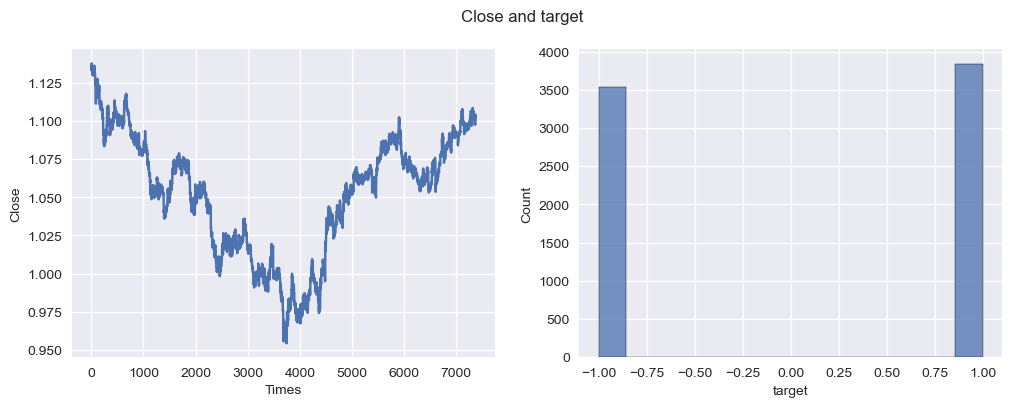

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 4))
ax1, ax2 = ax.flatten()

ax1.plot(df.index, df['Close'])
ax1.set_xlabel('Times')
ax1.set_ylabel('Close')
sns.histplot(df, x='target', ax=ax2)
plt.suptitle('Close and target')
plt.show()

Признак target ровно распределяется между значениями 1 (свеча вверх) и -1 (свеча вниз). 

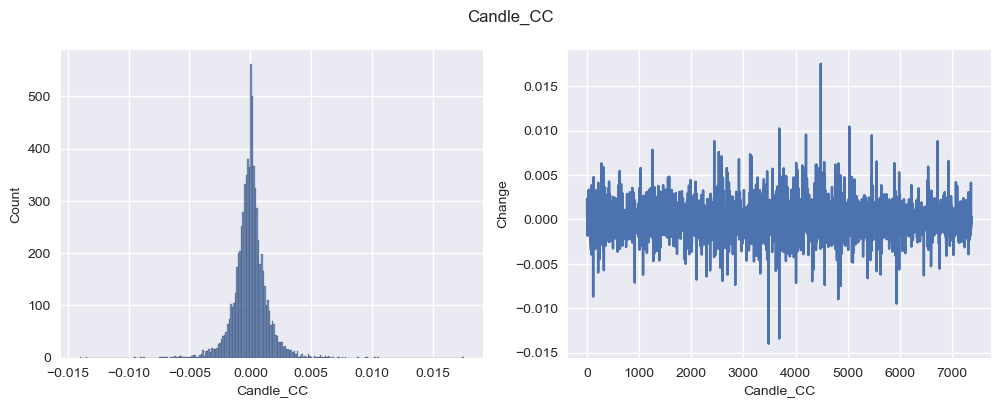

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 4))
ax1, ax2 = ax.flatten()

sns.histplot(df, x='Candle_CC', ax=ax1)
ax2.plot(df.index, df['Candle_CC'])
ax2.set_xlabel('Candle_CC')
ax2.set_ylabel('Change')

plt.suptitle('Candle_CC')
plt.show()

Признак Candle_CC следует нормальному распределению.

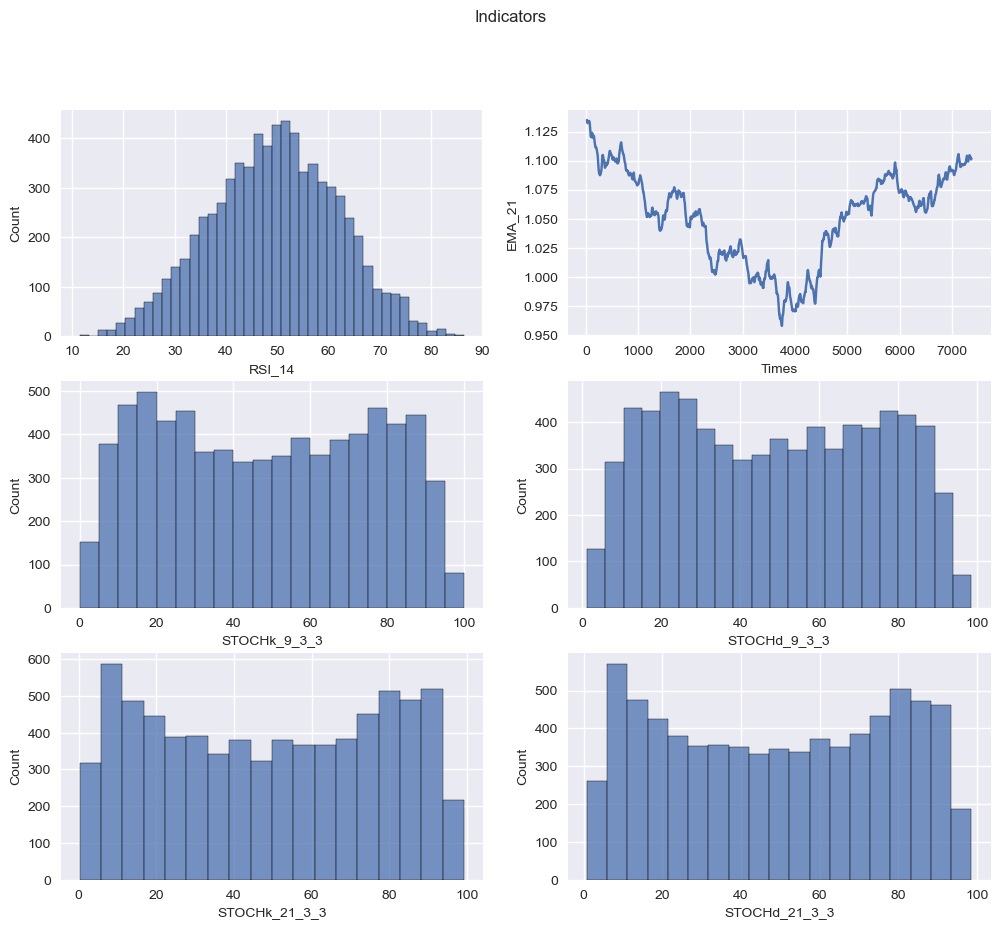

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (12, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

sns.histplot(df, x='RSI_14', ax=ax1)
ax2.plot(df.index, df['EMA_21'])
ax2.set_xlabel('Times')
ax2.set_ylabel('EMA_21')
sns.histplot(df, x='STOCHk_9_3_3', ax=ax3)
sns.histplot(df, x='STOCHd_9_3_3', ax=ax4)
sns.histplot(df, x='STOCHk_21_3_3', ax=ax5)
sns.histplot(df, x='STOCHd_21_3_3', ax=ax6)

plt.suptitle('Indicators')
plt.show()
# sns.histplot(df, x='Cnt', ax=ax4)

Из графиков понятно, что показатели Стохастического осциллятора следуют бимодальному распределению и нередко находятся в состоянии перекупленности или перепроданности. Показатели же индикатора RSI следуют нормальному распределению.

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\4291307051.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



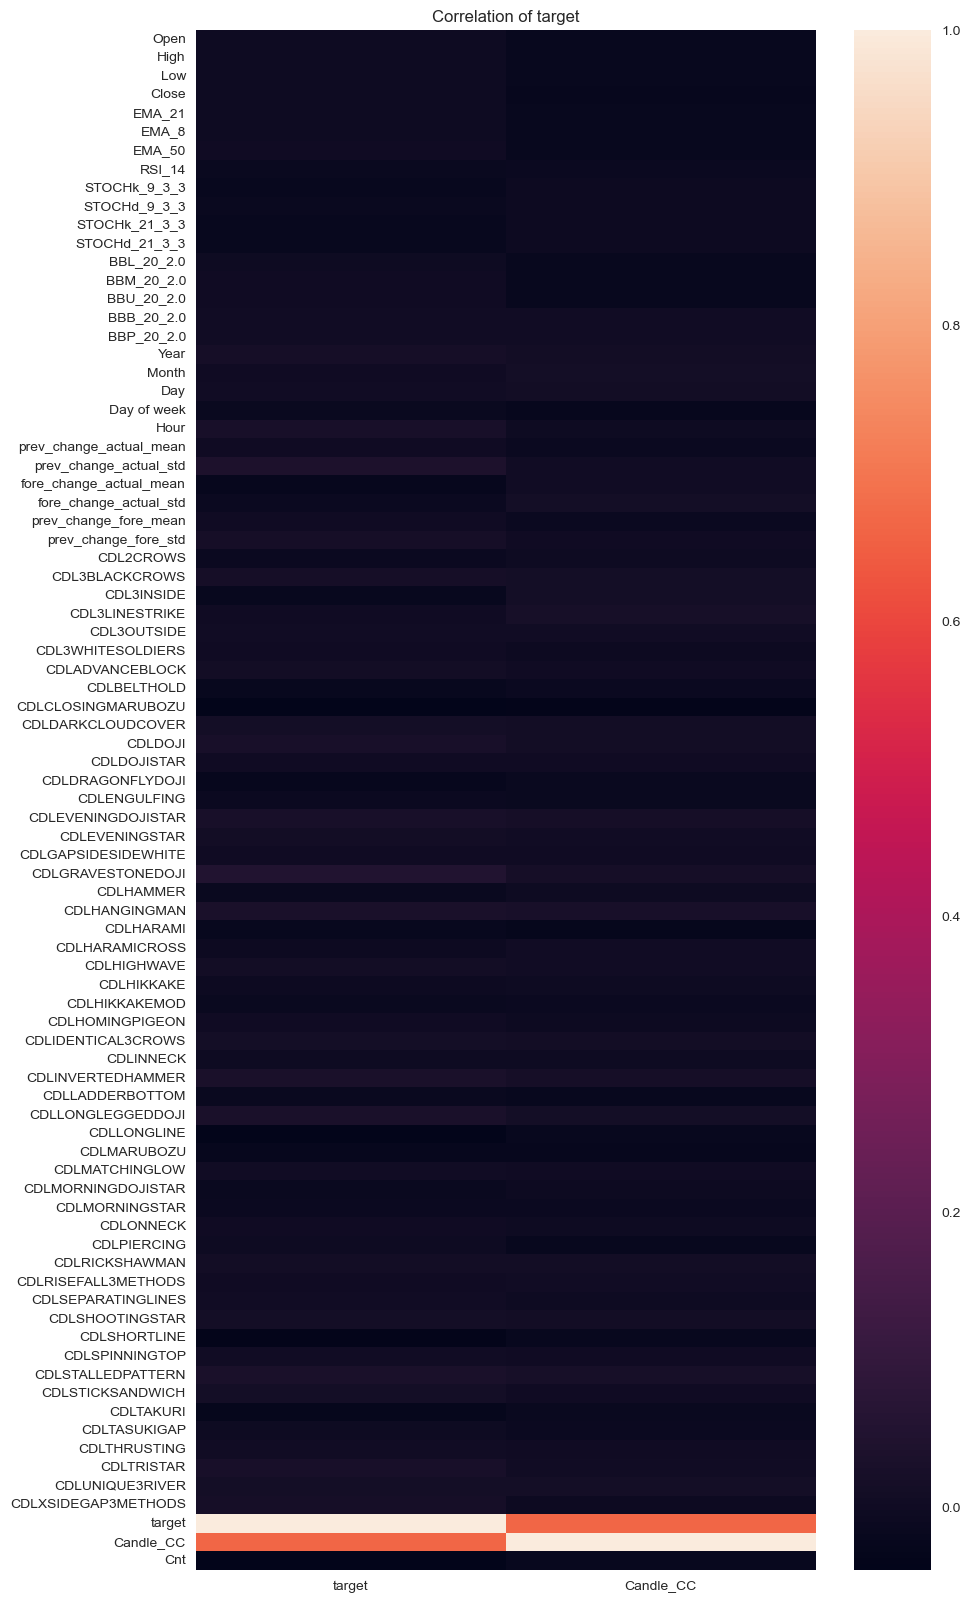

In [11]:
plt.figure(figsize = (10,20))
df['Candle_CC'] = df['Candle_CC'].shift(-1)
sns.heatmap(df.corr()[['target', 'Candle_CC']])
df['Candle_CC'] = df['Candle_CC'].shift(1)
plt.title('Correlation of target')
plt.show()

Линейной корреляции целевой переменной с другими признаками не наблюдается.

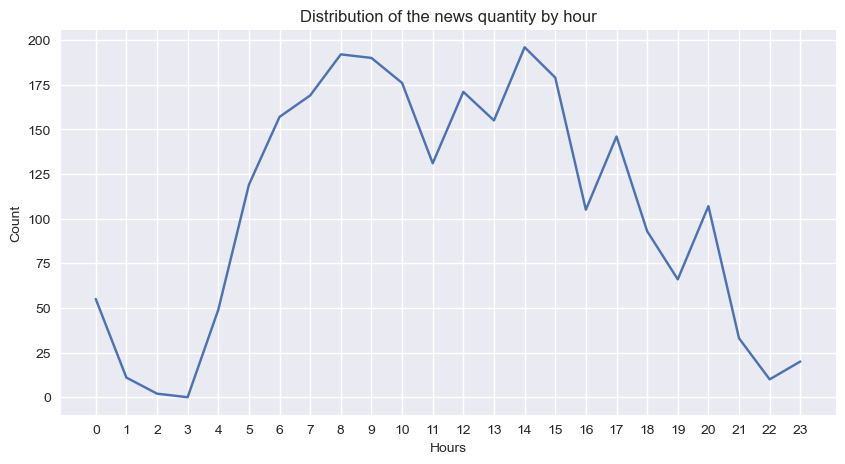

In [12]:
plt.figure(figsize = (10,5))
plt.plot(df.groupby('Hour')['prev_change_actual_std'].count())
plt.title('Distribution of the news quantity by hour')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.xticks(range(0, 24))
plt.show()

Чаще всего новости выходят в 8 и 14 часов (GMT+00).

In [13]:
df['Candle_CC'] = df['Candle_CC'].apply(lambda x: cand(x))

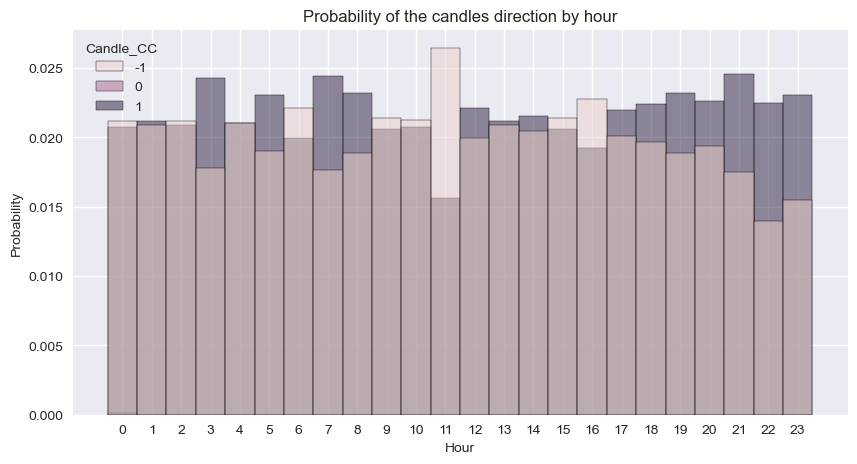

In [14]:
plt.figure(figsize = (10,5))
sns.histplot(data=df, x="Hour", hue="Candle_CC", discrete=True, stat='probability')
plt.title('Probability of the candles direction by hour')
plt.xticks(range(0, 24))
plt.show()

В 11 часов (GMT+00) с большей вероятностью появится свеча вниз, после 17 часов - свечи вверх.

In [18]:
powp = df[['Close', 'Candle_CC', 'Cnt']]
cols = []

for i in range(1, 21):
    powp[f'Close_after_{i}'] =  powp['Close'].shift(-i) - powp['Close']
    cols.append(f'Close_after_{i}')

powp = powp.groupby(['Candle_CC', 'Cnt']).mean().reset_index()

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\2926972251.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\2926972251.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\2926972251.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

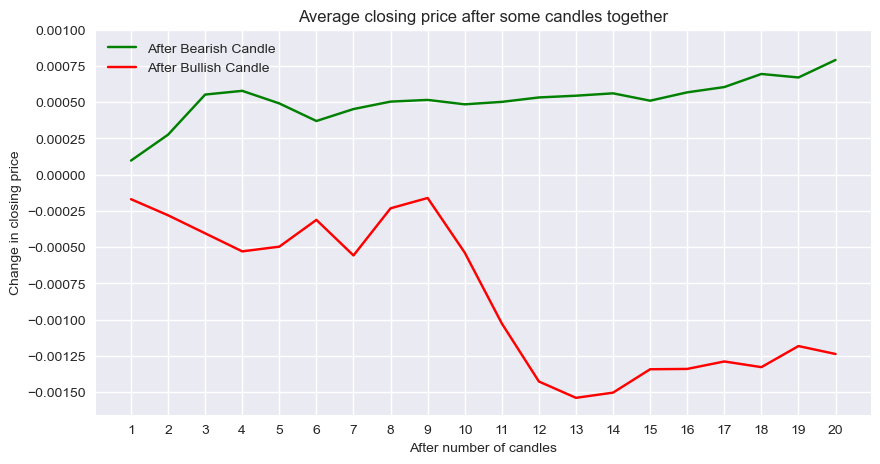

In [19]:
plt.figure(figsize = (10,5))
plt.plot(range(1, 21), powp.groupby('Candle_CC').mean().iloc[0][2:], label='After Bearish Candle', c='green')
# plt.plot(range(1, 21), powp.groupby('Candle_CC').mean().iloc[1][2:], label='After Candle with same open and close', c='blue')
plt.plot(range(1, 21), powp.groupby('Candle_CC').mean().iloc[2][2:], label='After Bullish Candle', c='red')
plt.legend()
plt.title('Average closing price after some candles together')
plt.xlabel('After number of candles')
plt.ylabel('Change in closing price')
plt.xticks(range(1, 21))
plt.yticks(np.linspace(-0.0015, 0.0010, 11))

plt.show()

В среднем после нескольких свечей в одну сторону на 4 свече достигается краткосрочный максимум цены в обратную сторону. Долгосрочный максимум находится после 12 свечи.

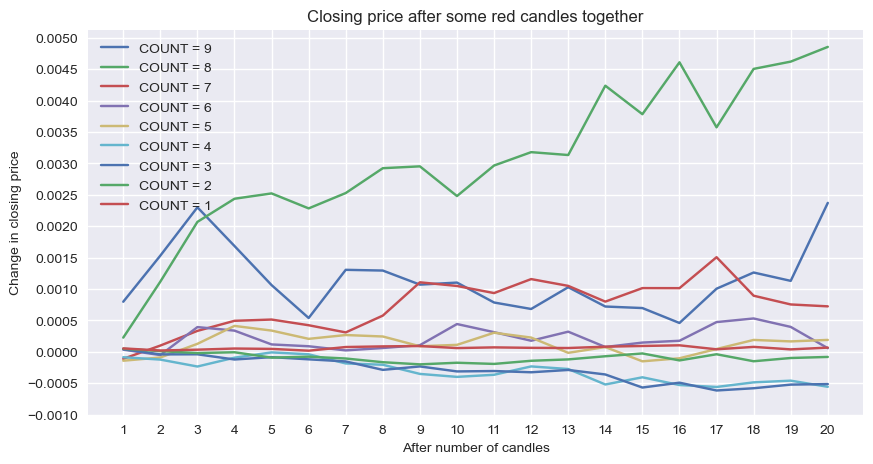

In [20]:
plt.figure(figsize = (10,5))
for i in powp[powp['Candle_CC'] == -1]['Cnt']:
    plt.plot(range(1, 21), powp[(powp['Candle_CC'] == -1) & (powp['Cnt'] == i)][cols].values[0], label=f'COUNT = {i*-1}')
plt.title('Сlosing price after some red candles together')
plt.legend()
plt.xlabel('After number of candles')
plt.ylabel('Change in closing price')
plt.xticks(range(1, 21))
plt.yticks(np.linspace(-0.001, 0.005, 13))
plt.show()

Исходя из графика, отличимое от нуля увеличение цены начинается после 5-6 последовательных красных свеч, и приходится на свечи с 3-4 после них.

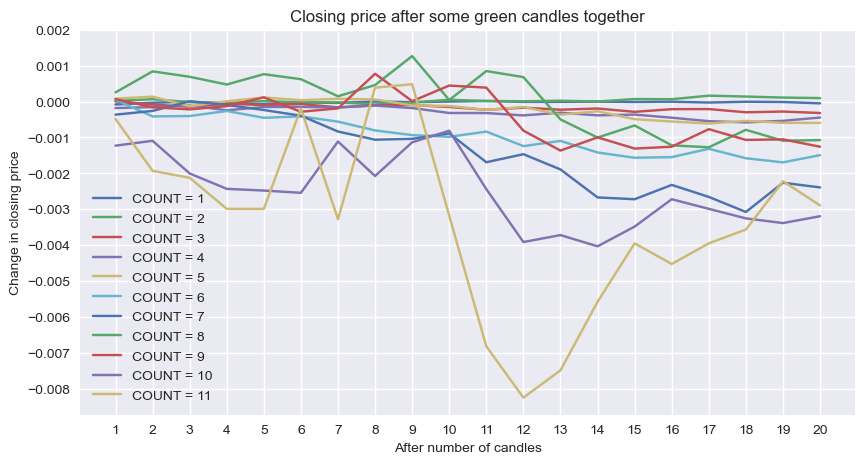

In [21]:
plt.figure(figsize = (10,5))
for i in powp[powp['Candle_CC'] == 1]['Cnt']:
    plt.plot(range(1, 21), powp[(powp['Candle_CC'] == 1) & (powp['Cnt'] == i)][cols].values[0], label=f'COUNT = {i}')
plt.title('Сlosing price after some green candles together')
plt.legend()
plt.xlabel('After number of candles')
plt.ylabel('Change in closing price')
plt.xticks(range(1, 21))
plt.yticks(np.linspace(-0.008, 0.002, 11))
plt.show()

Исходя из данного графика, отличимое от нуля уменьшение цены начинается после 6 последовательных зеленых свеч, и приходится на свечи 13-14 после них. Такое количество времени на разворот, вероятно, связано с восходящим трендом.

Расчет изменения цены в течение следующих 20 свечей после паттернов price action.

In [22]:
cdl_cols = []
for i in df.columns:
    if i.startswith('CDL'):
        cdl_cols.append(i)
        
cdl = df[['Close'] + cdl_cols]

after = []
for i in range(1, 21):
    cdl[f'Close_after_{i}_cdl'] =  cdl['Close'].shift(-i) - cdl['Close']
    after.append(f'Close_after_{i}_cdl')

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\1710098982.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\1710098982.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\zidav\AppData\Local\Temp\ipykernel_9016\1710098982.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

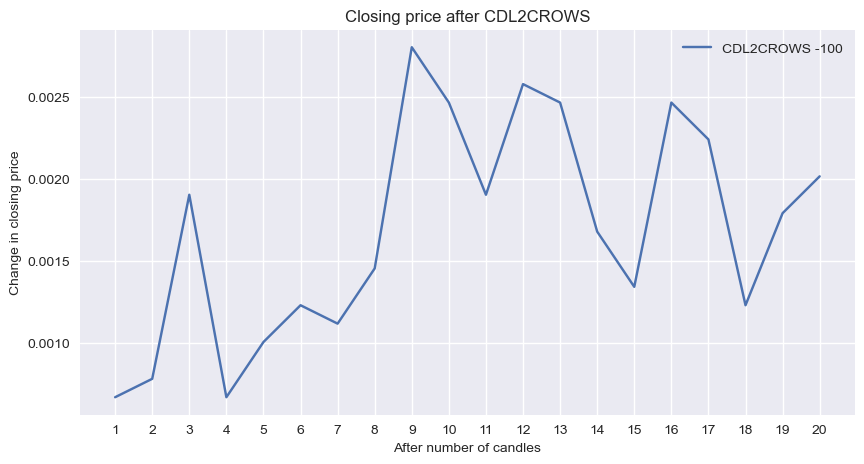

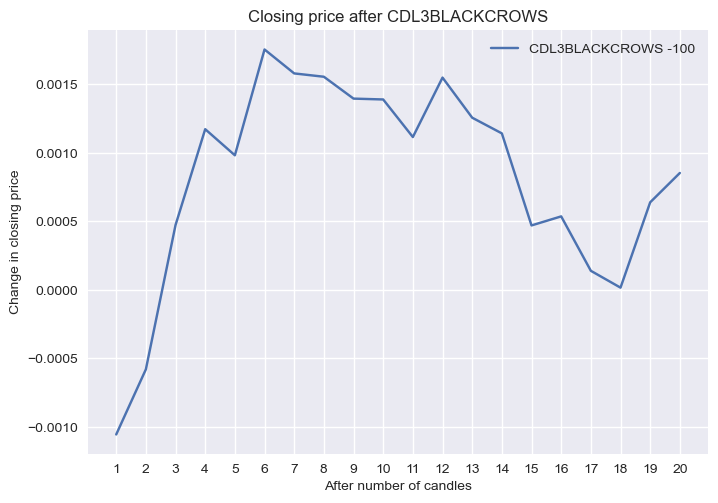

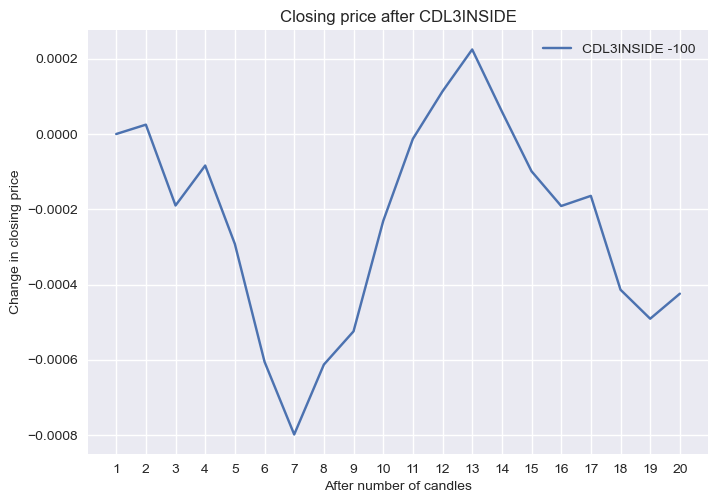

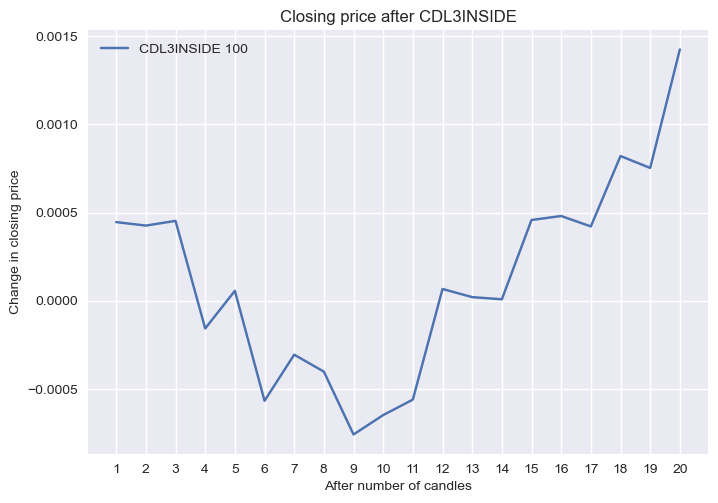

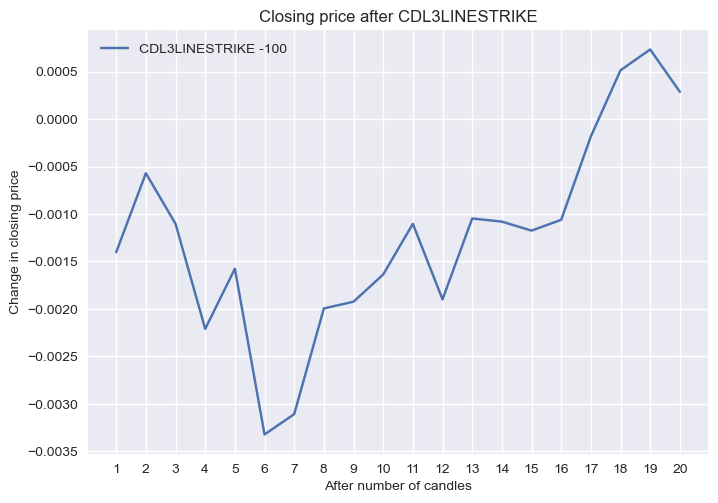

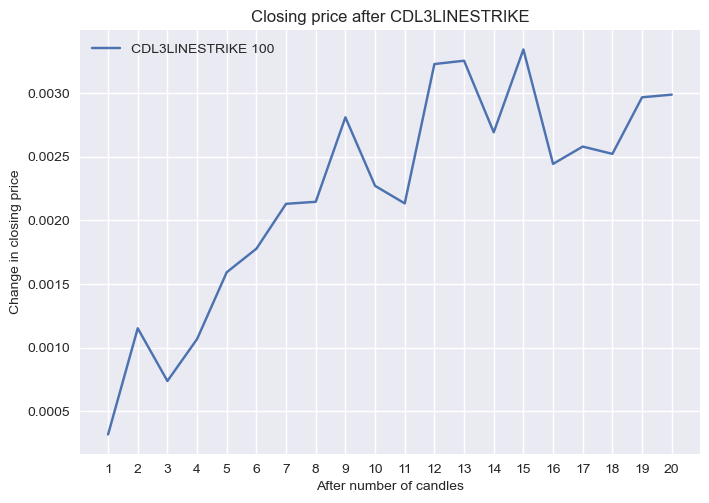

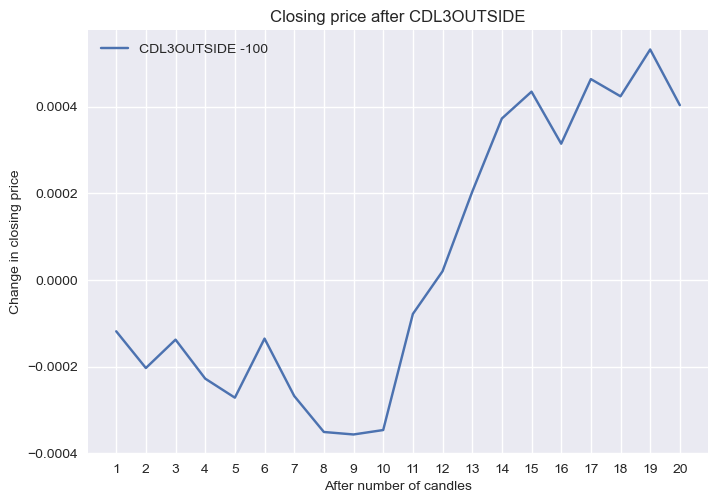

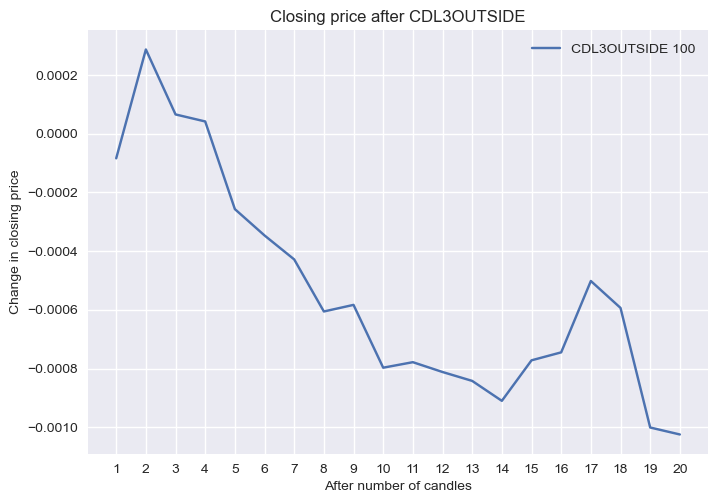

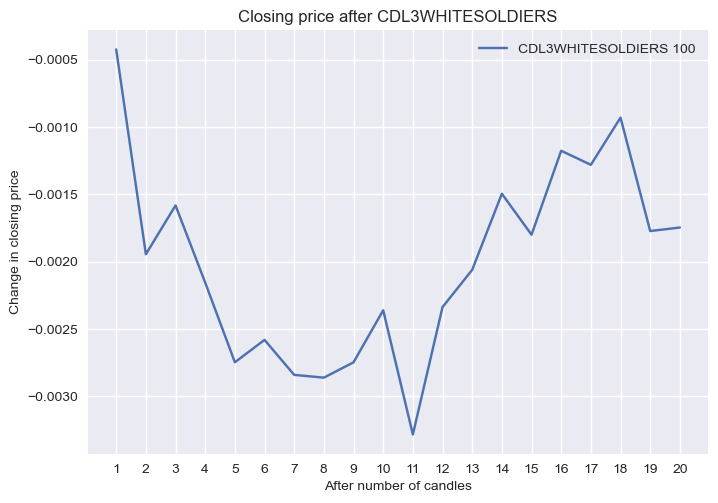

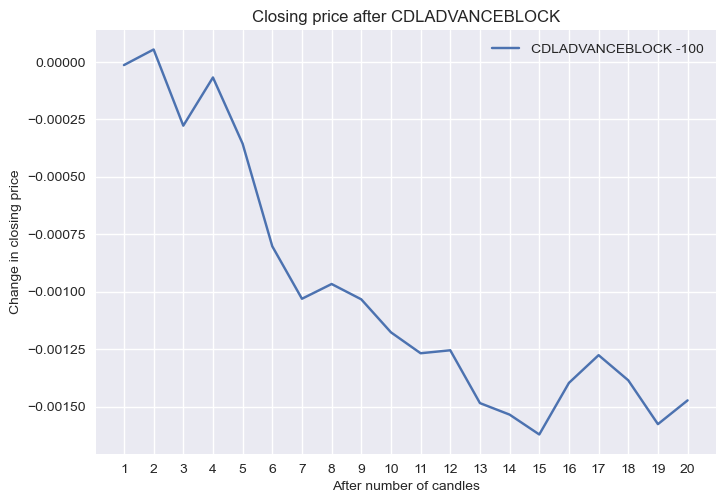

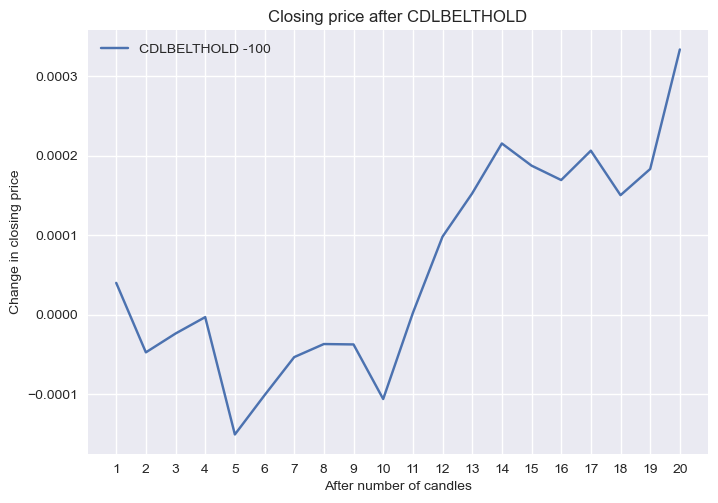

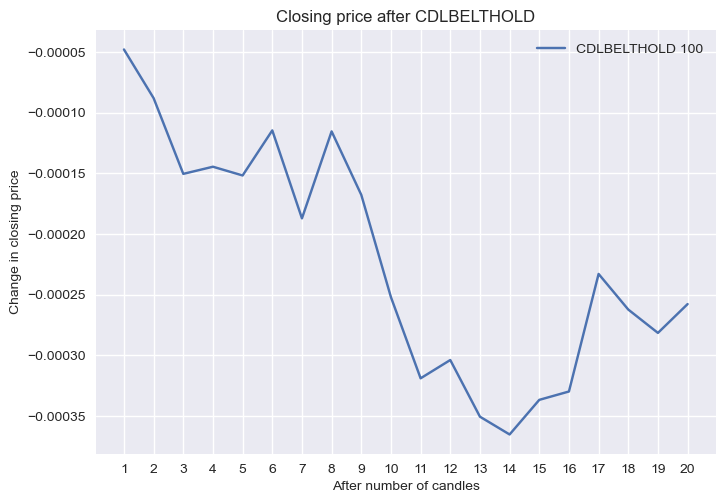

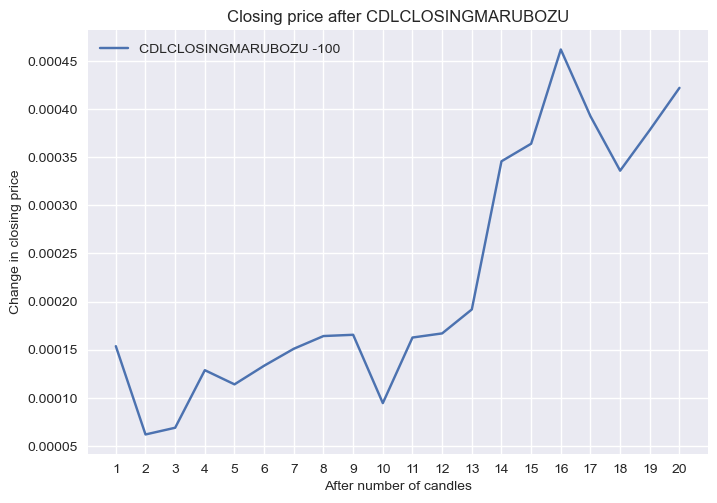

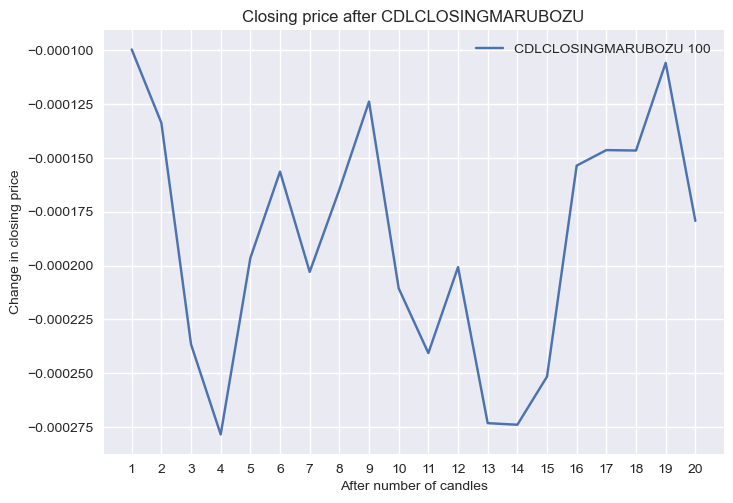

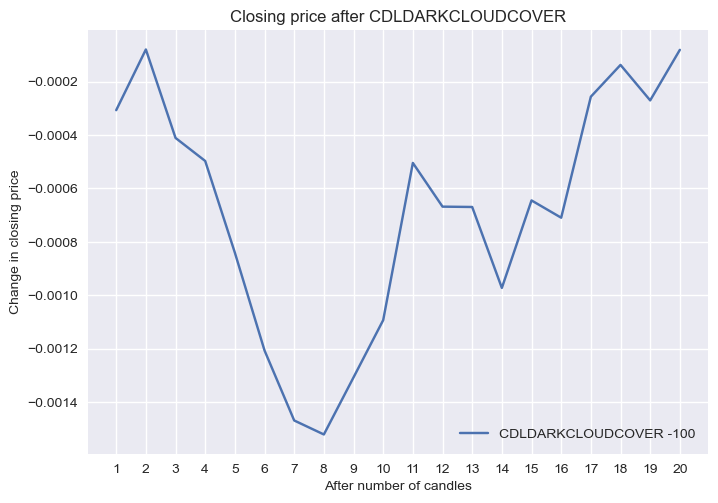

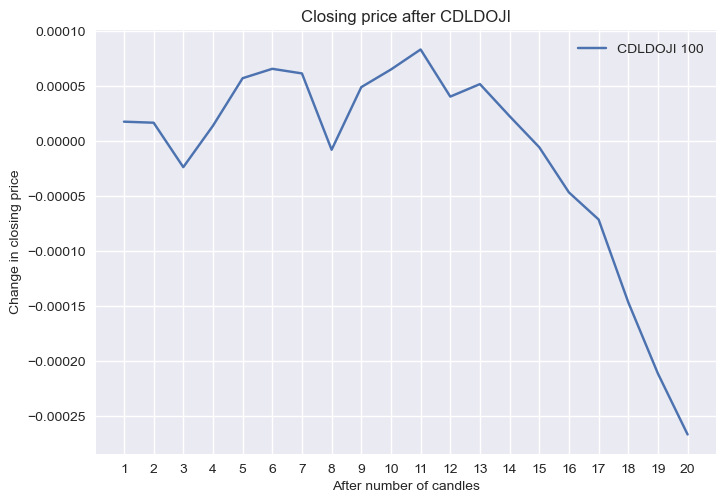

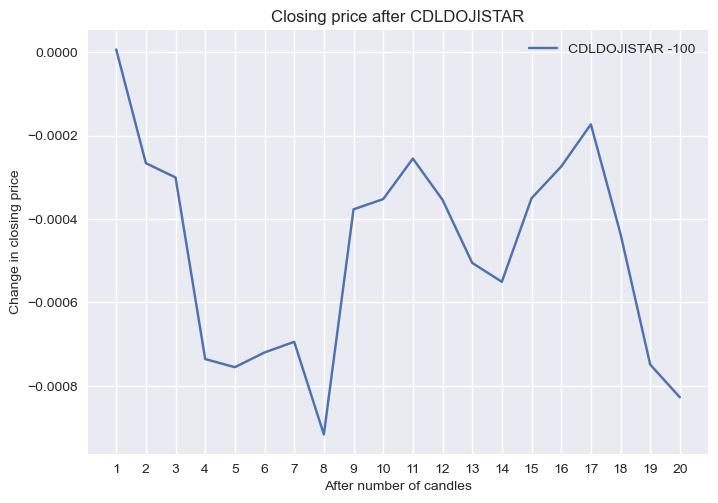

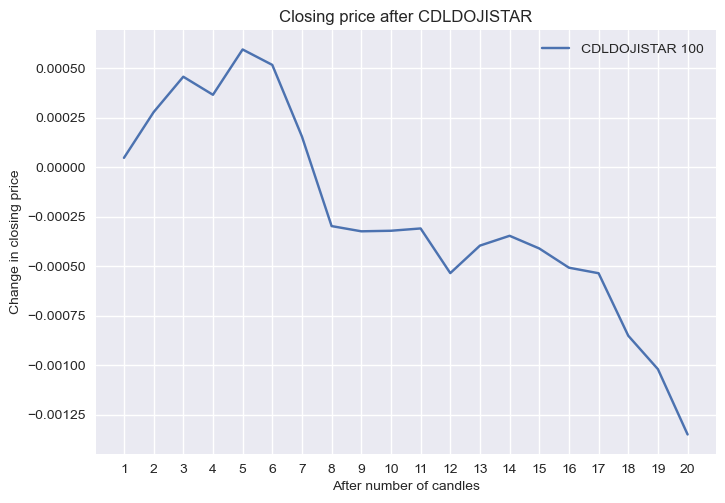

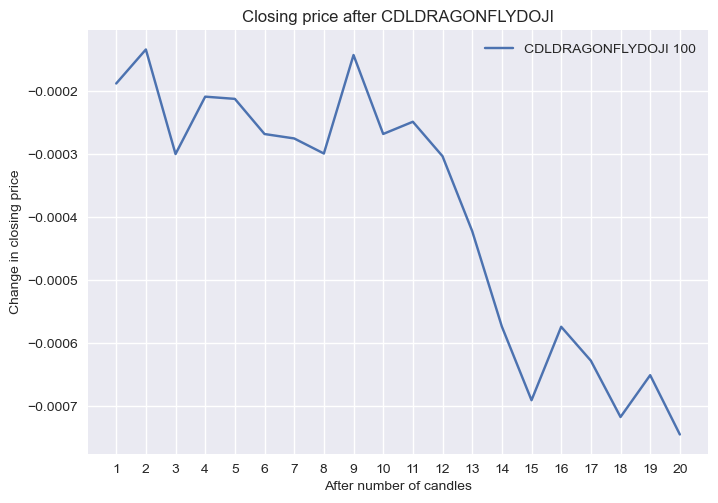

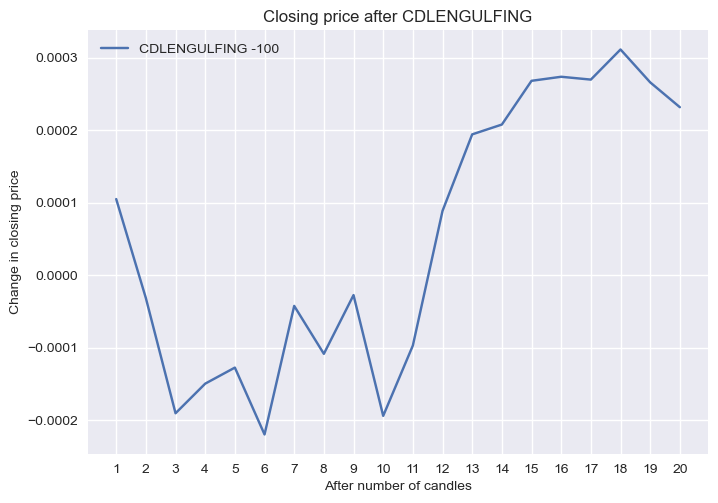

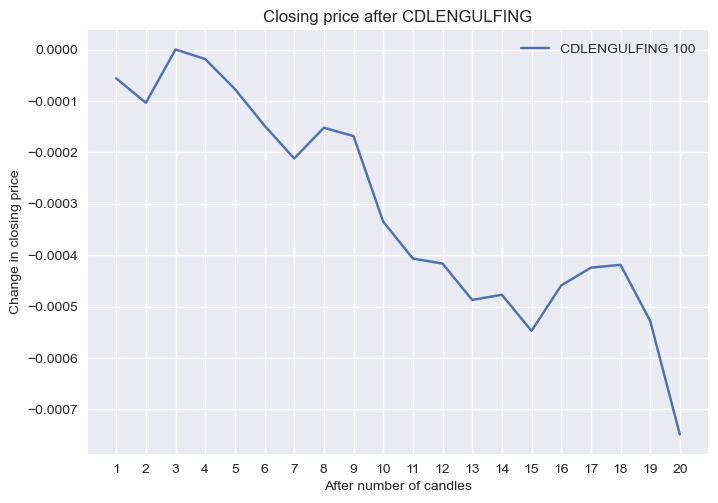

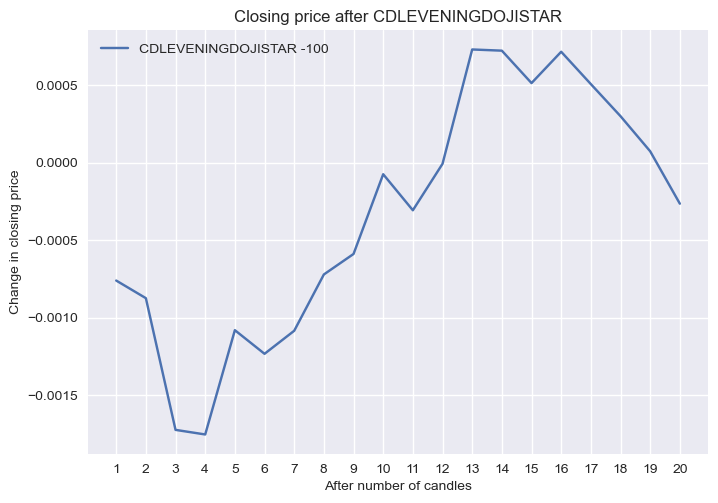

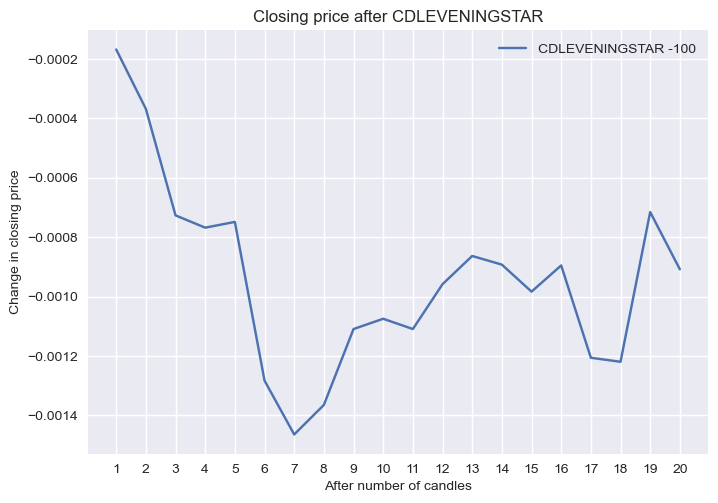

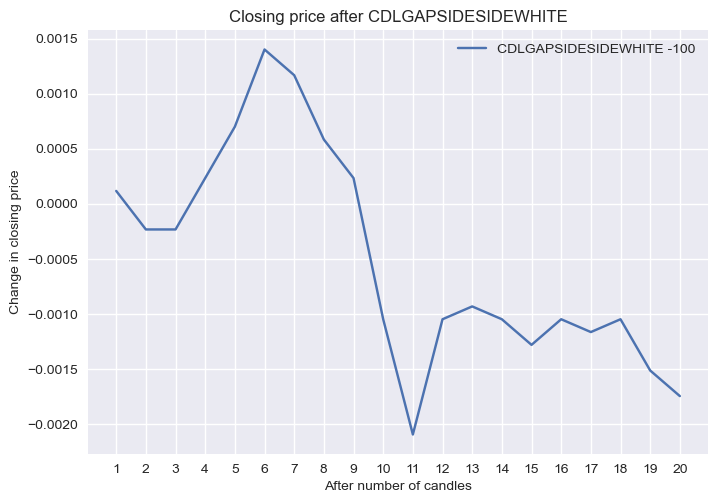

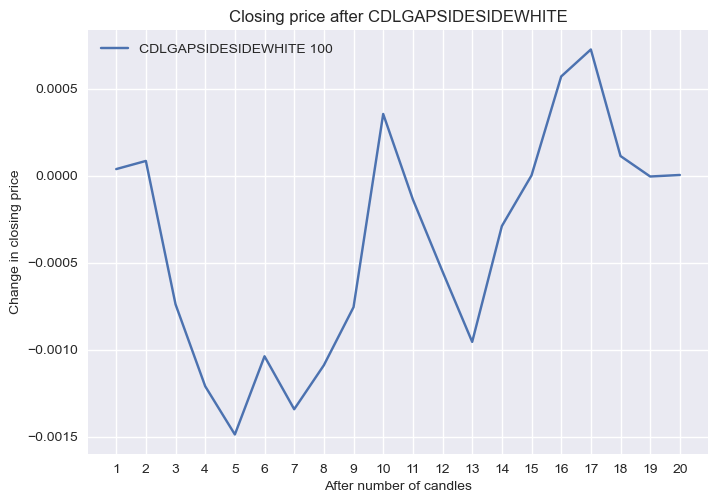

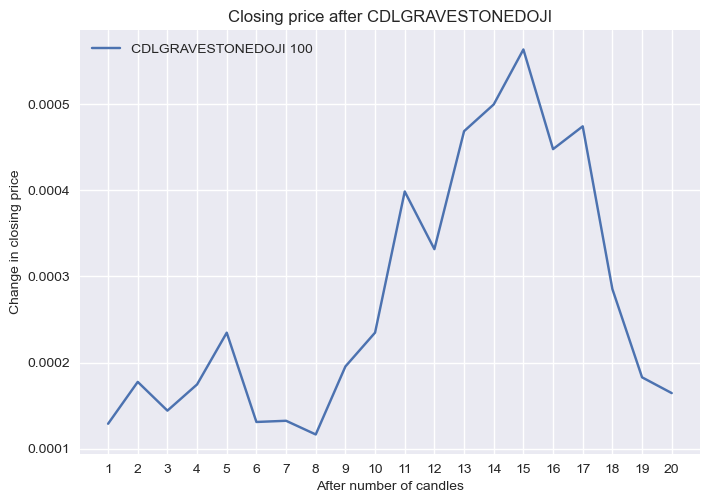

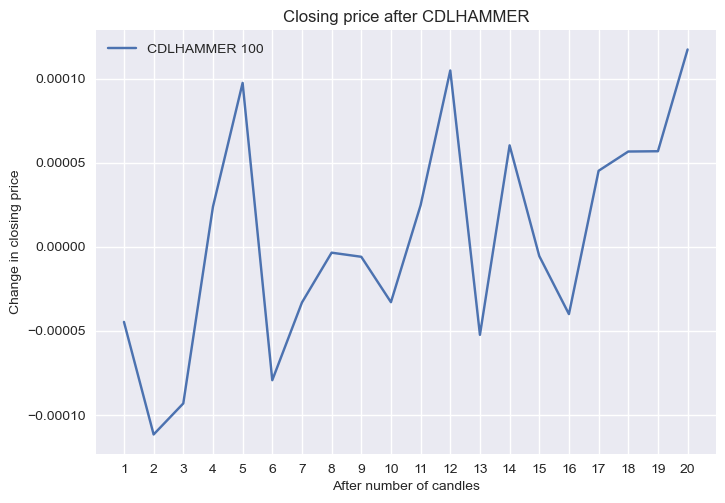

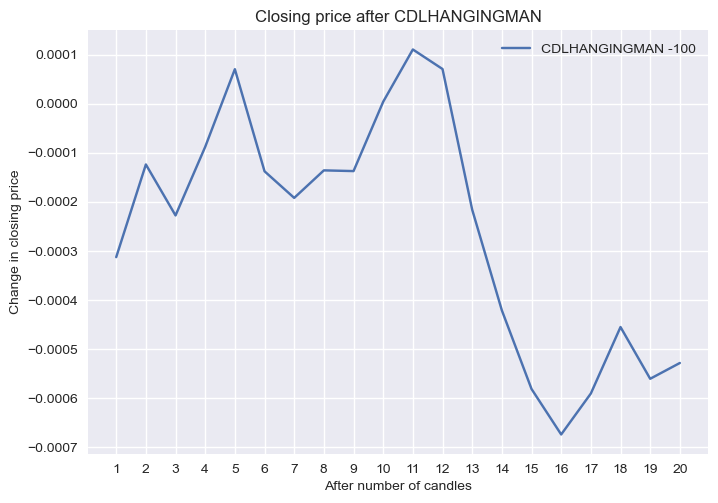

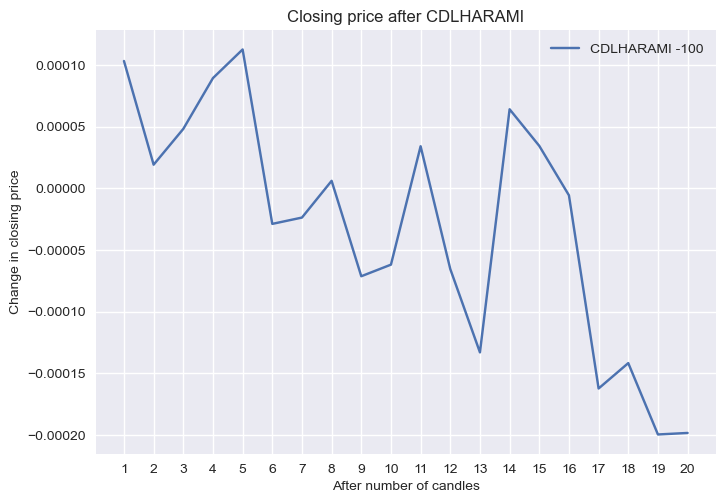

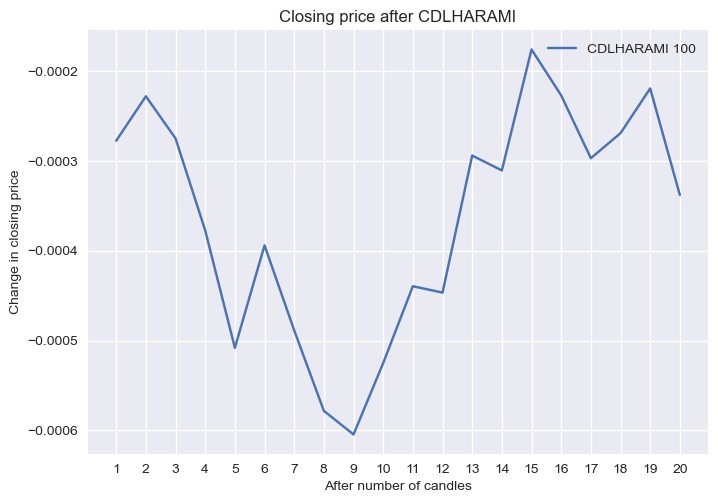

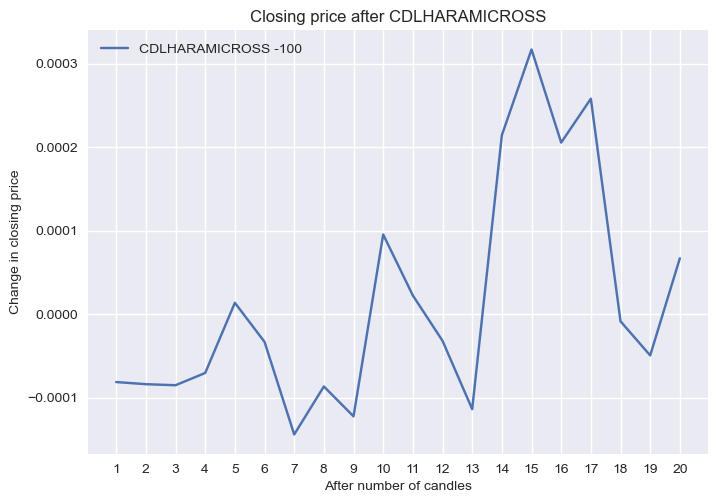

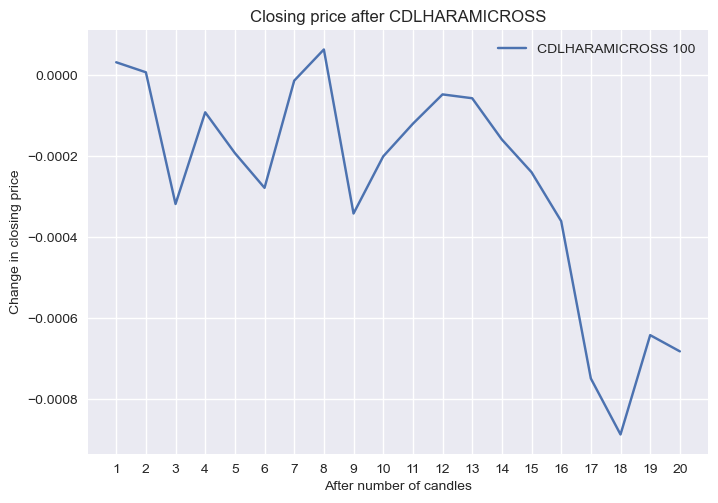

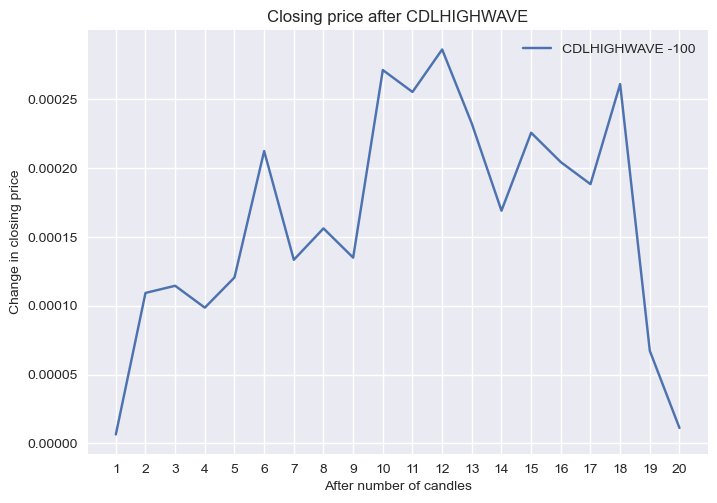

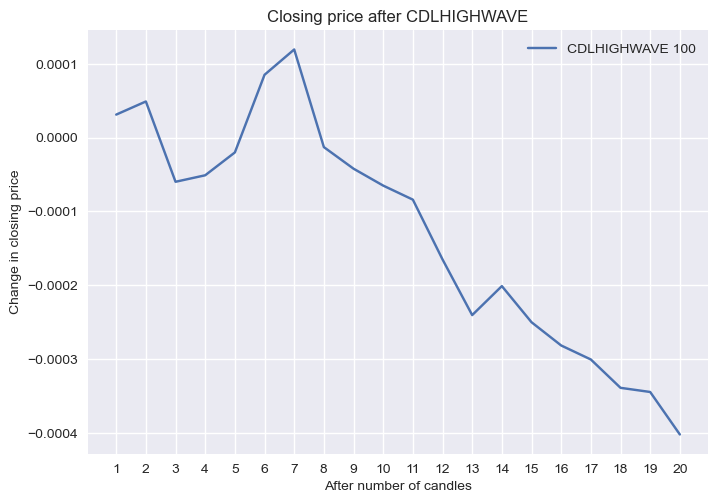

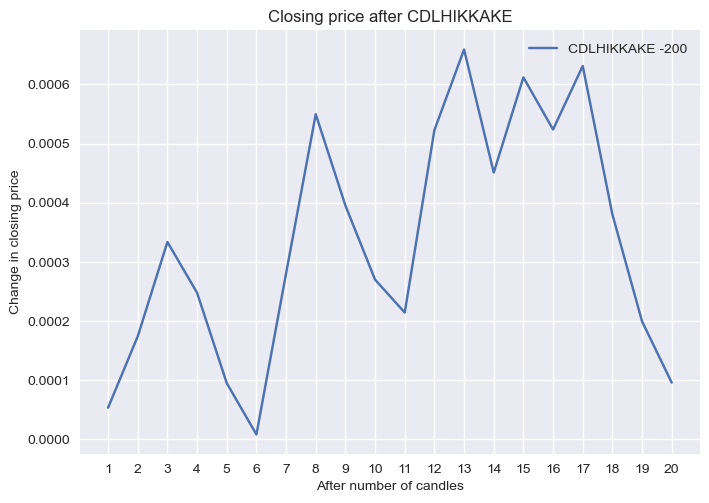

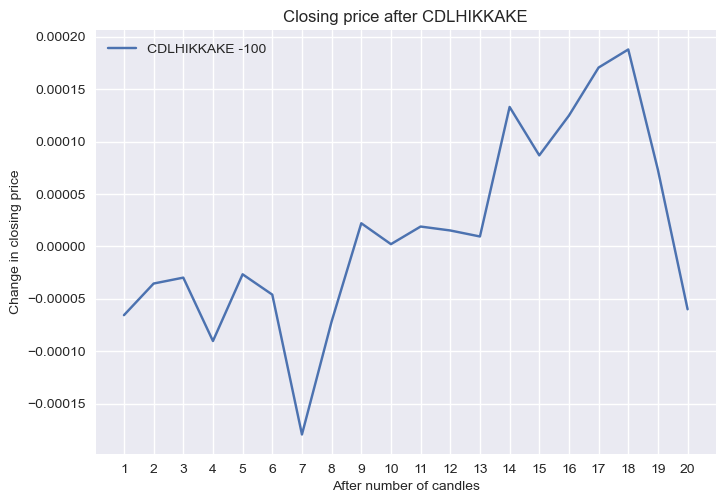

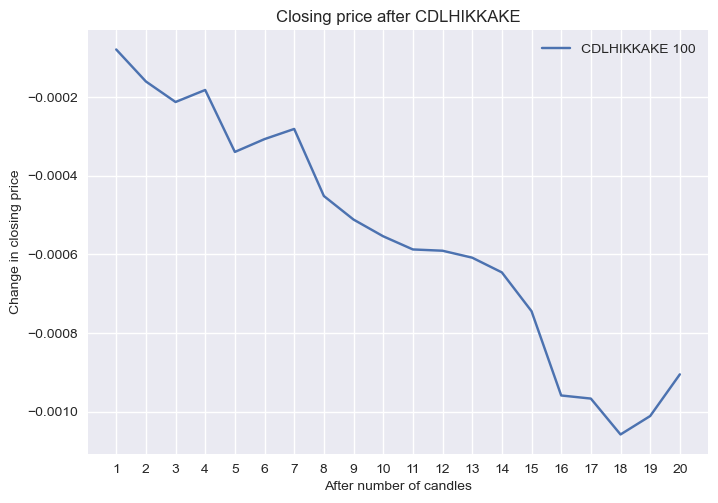

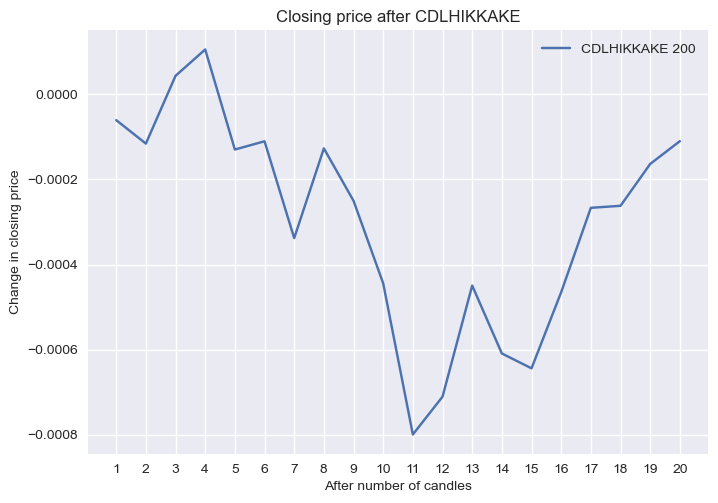

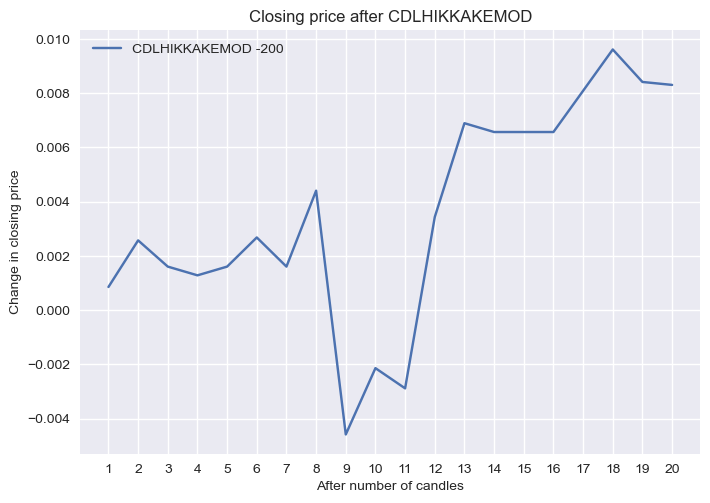

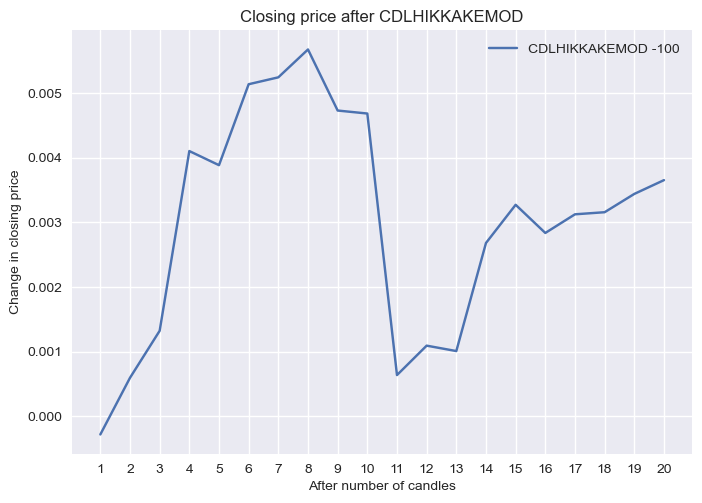

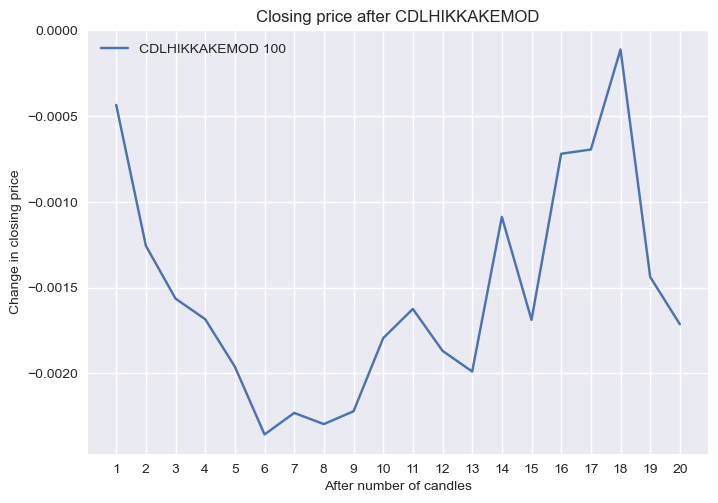

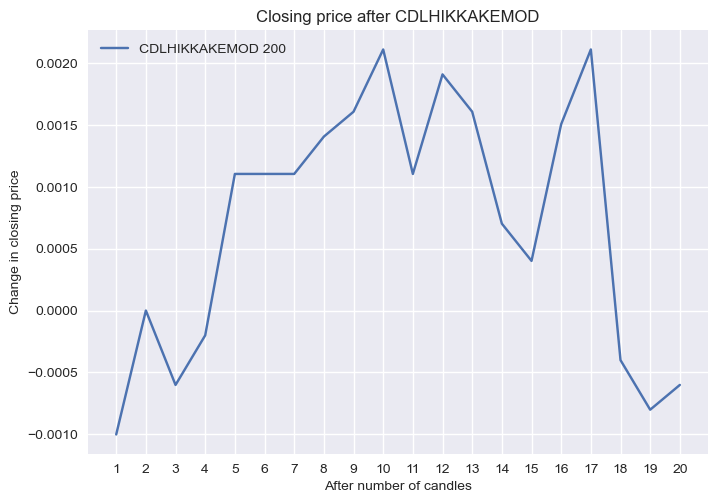

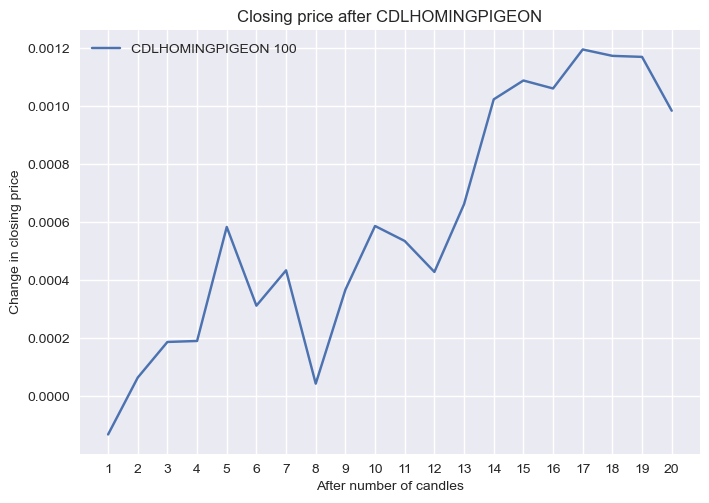

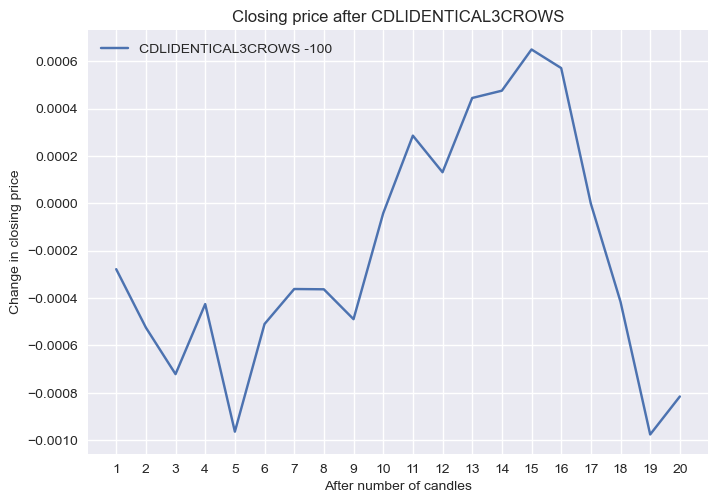

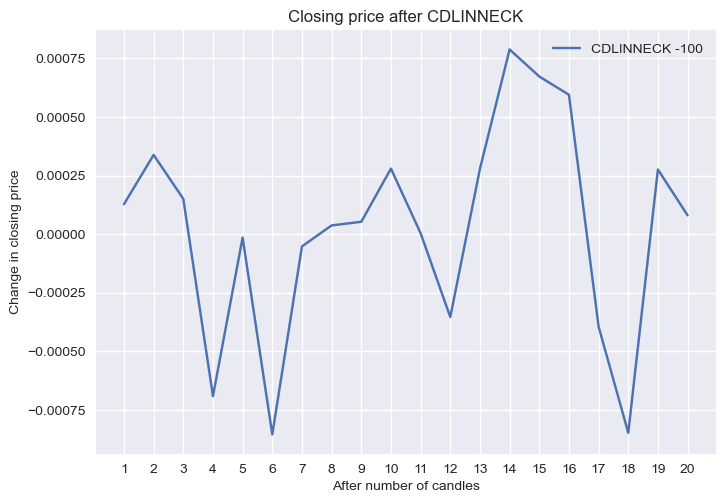

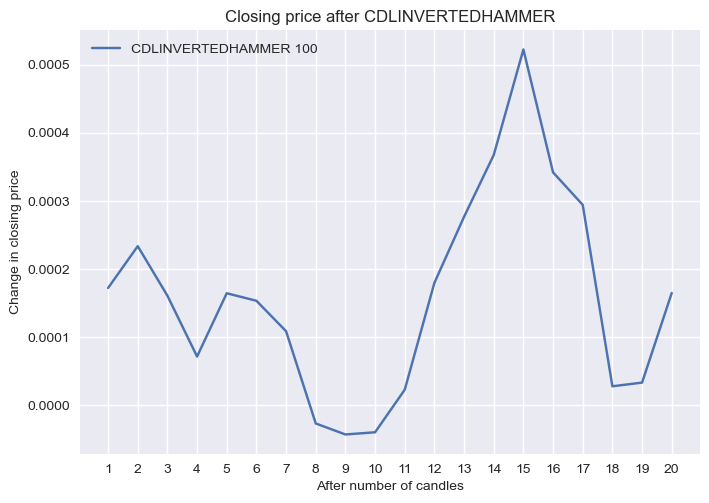

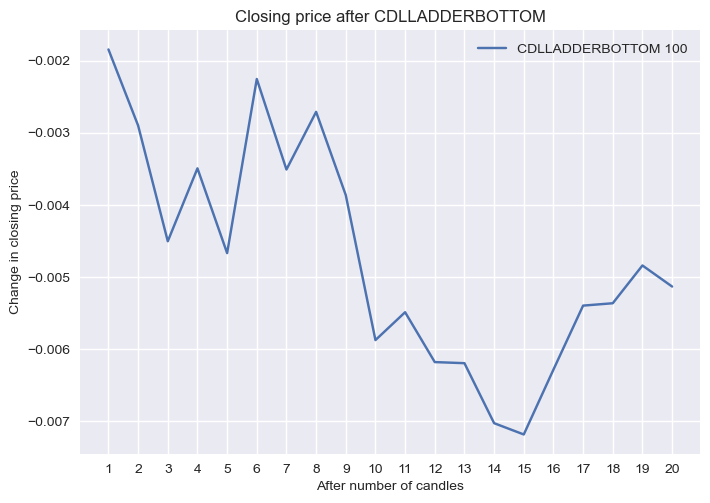

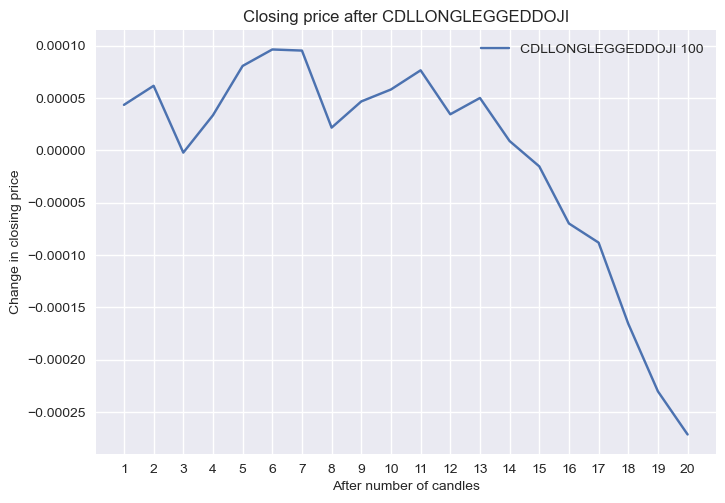

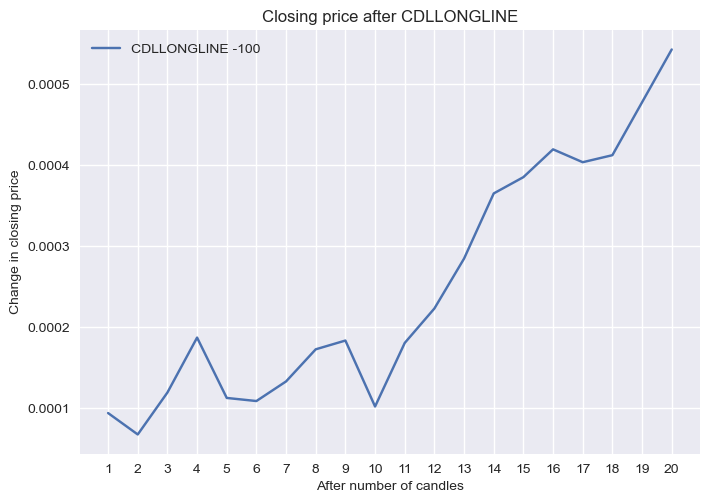

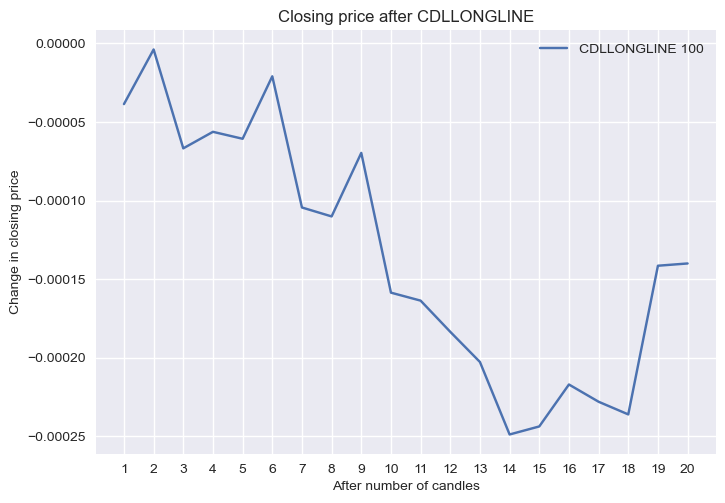

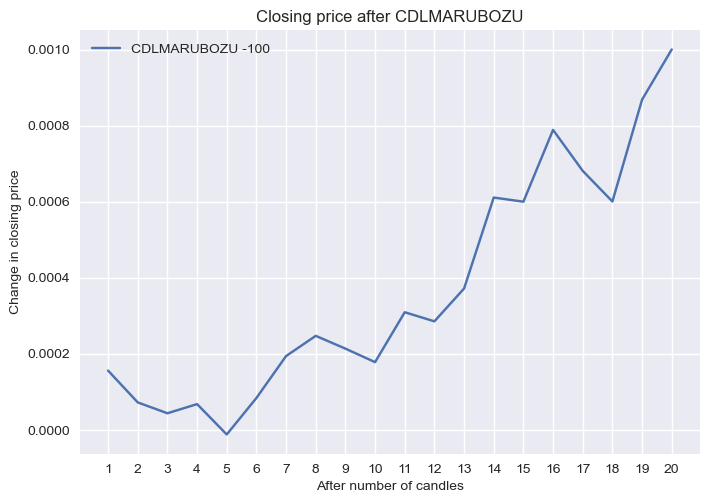

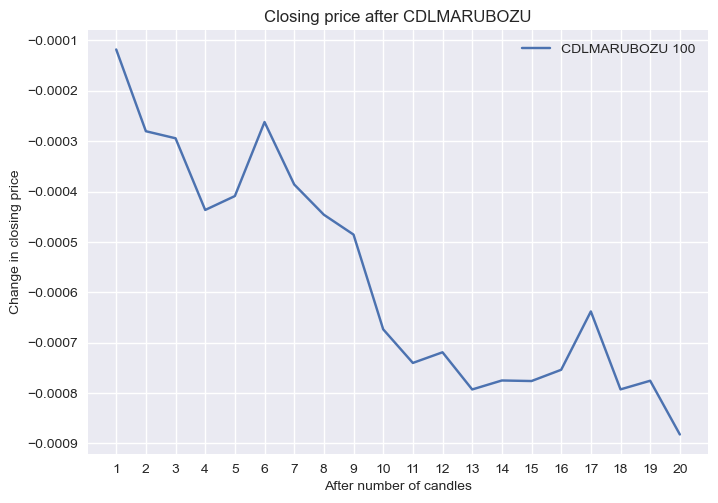

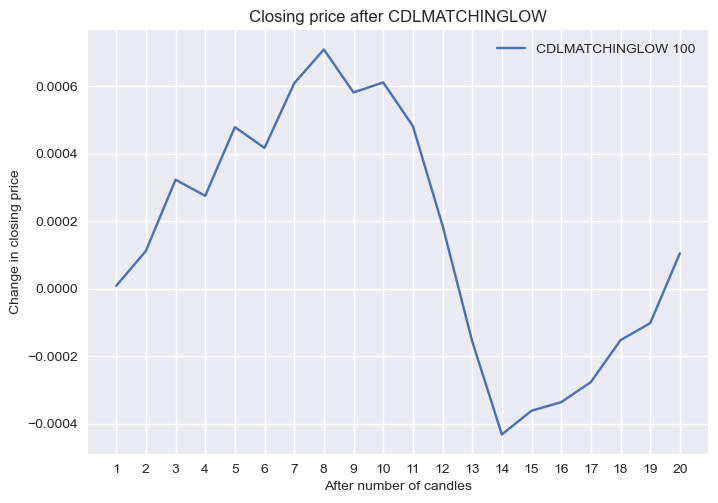

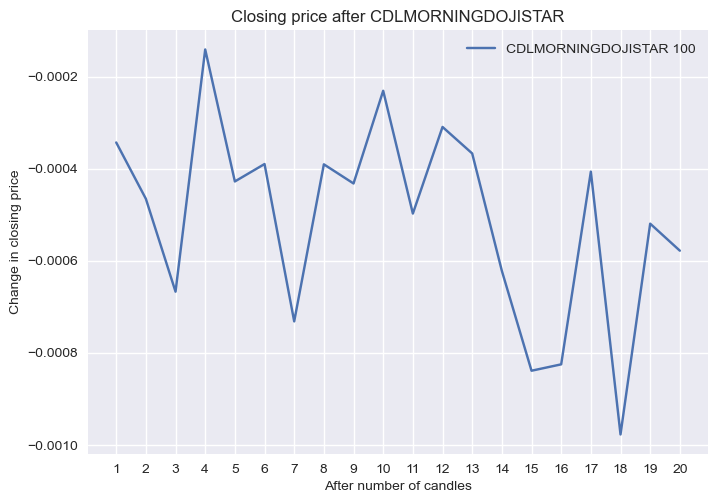

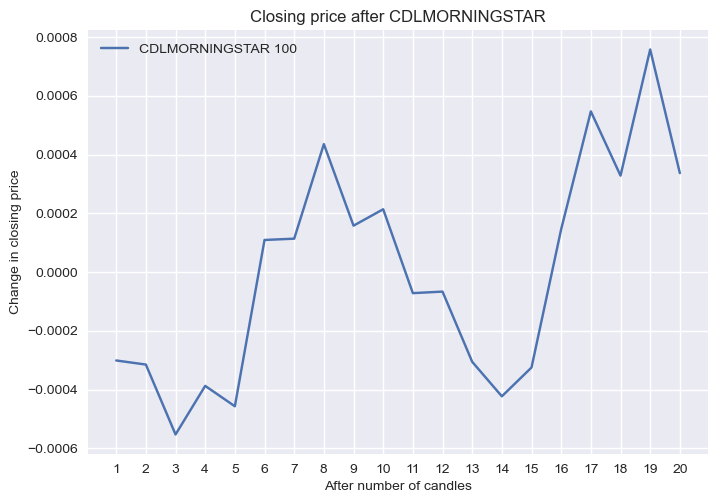

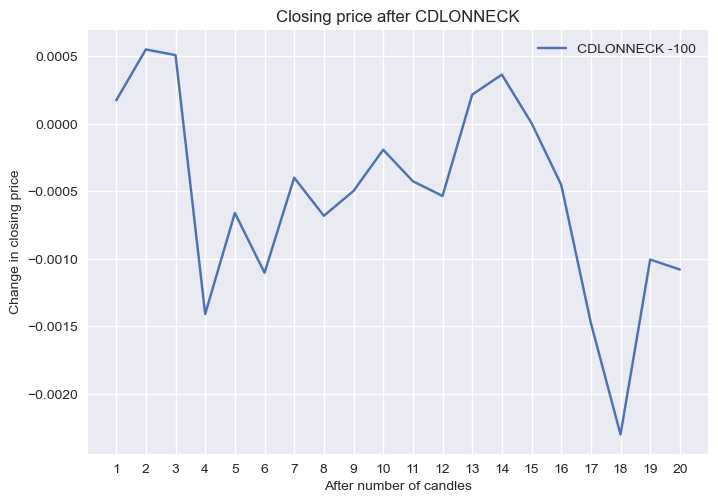

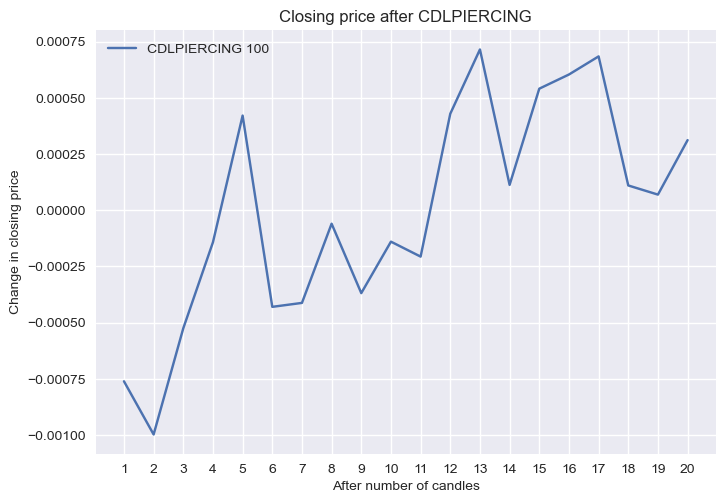

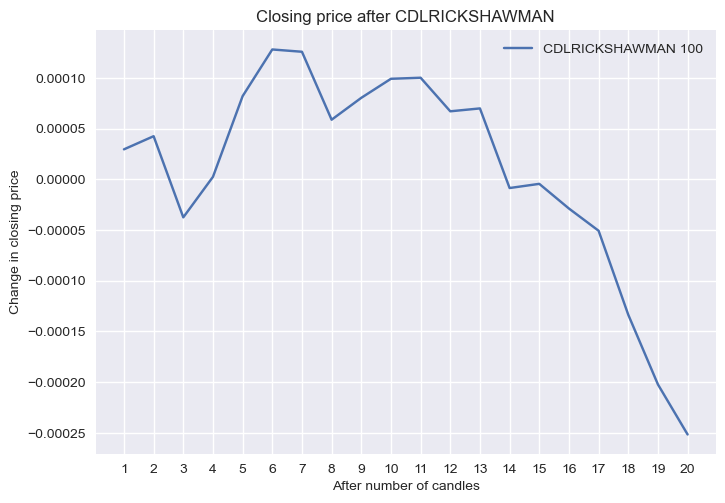

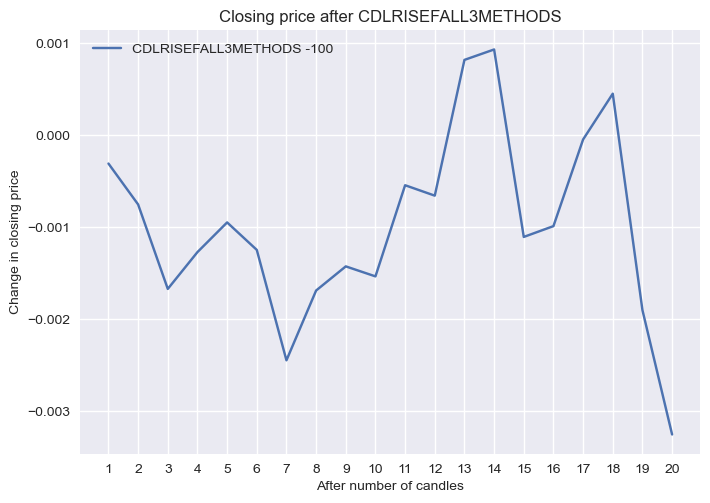

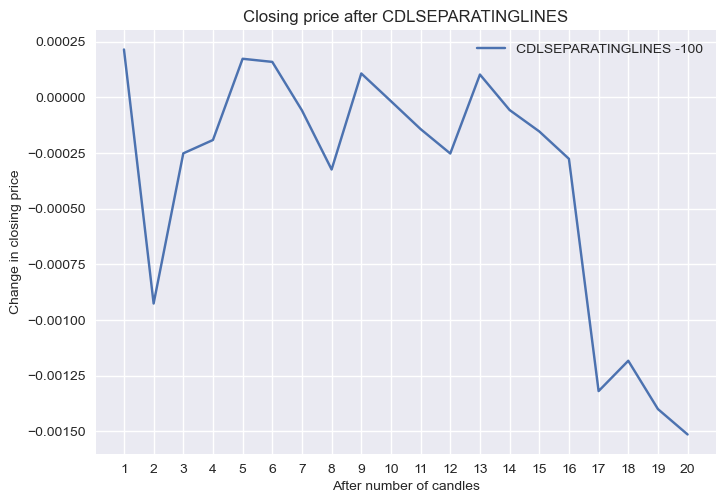

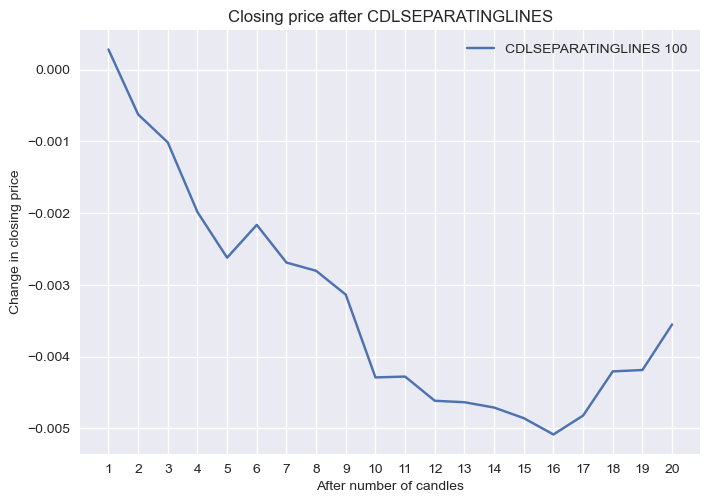

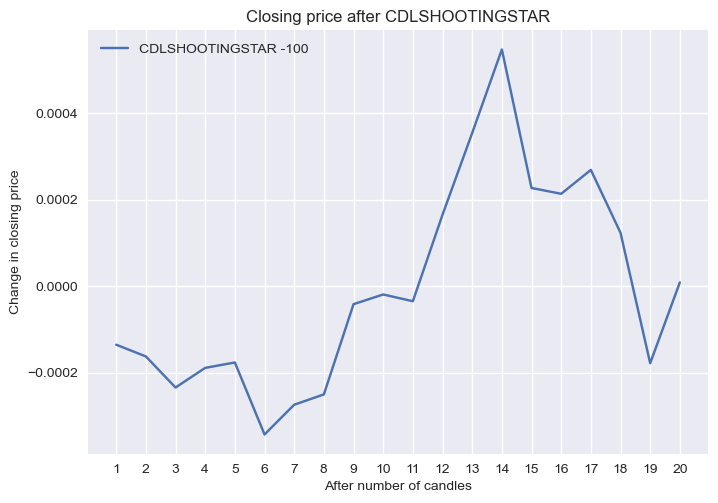

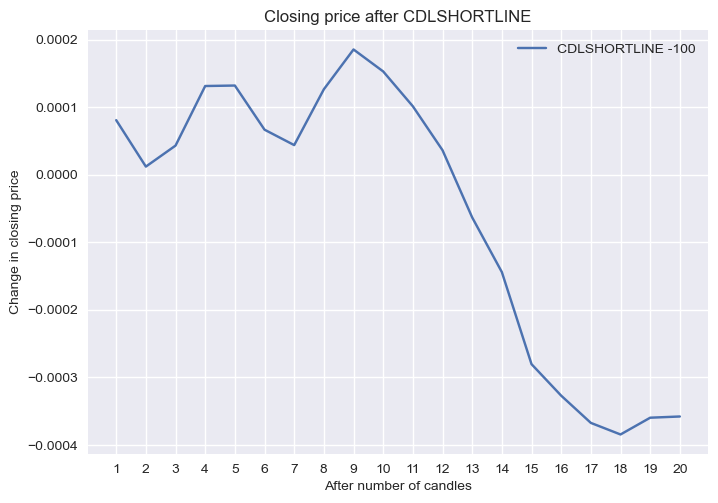

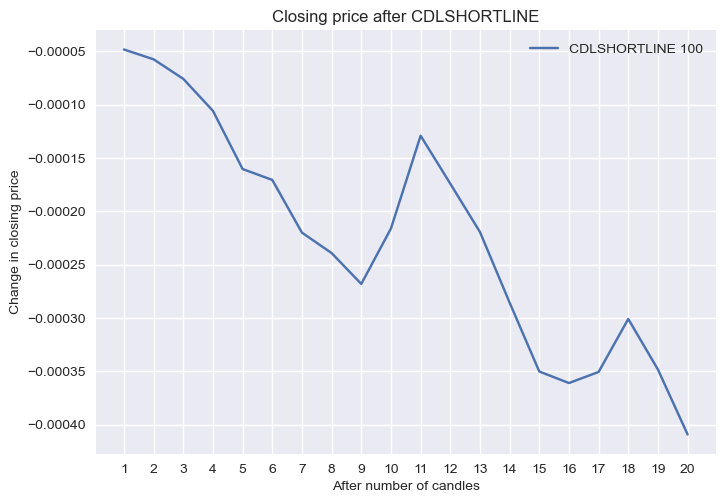

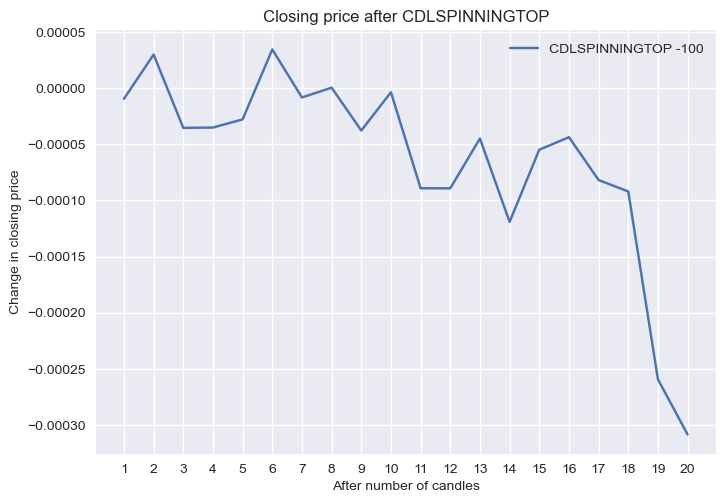

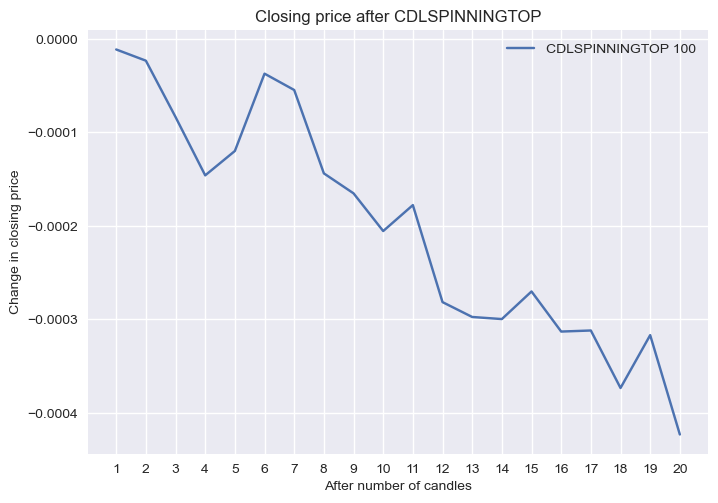

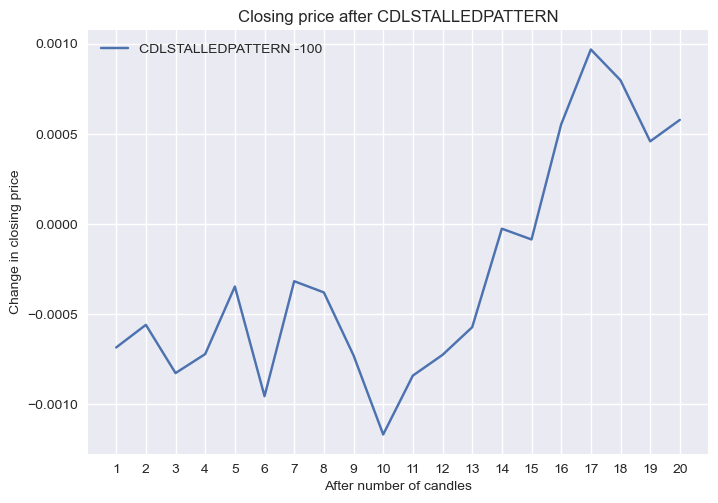

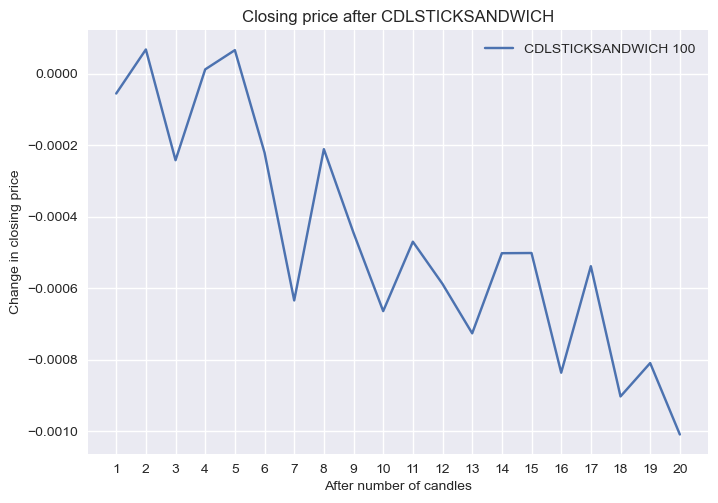

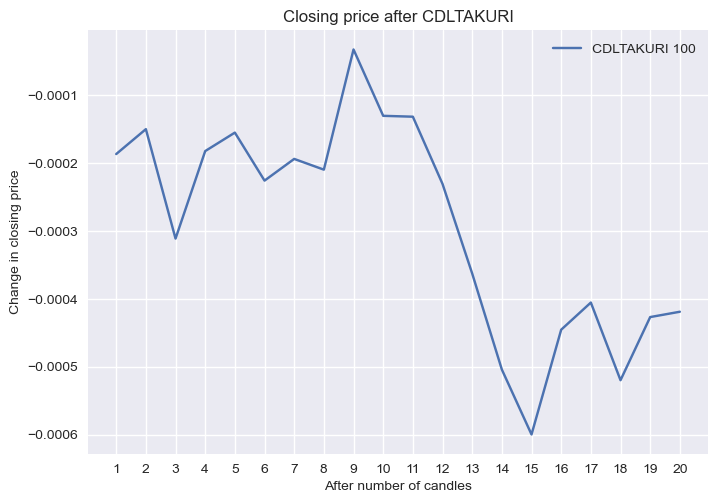

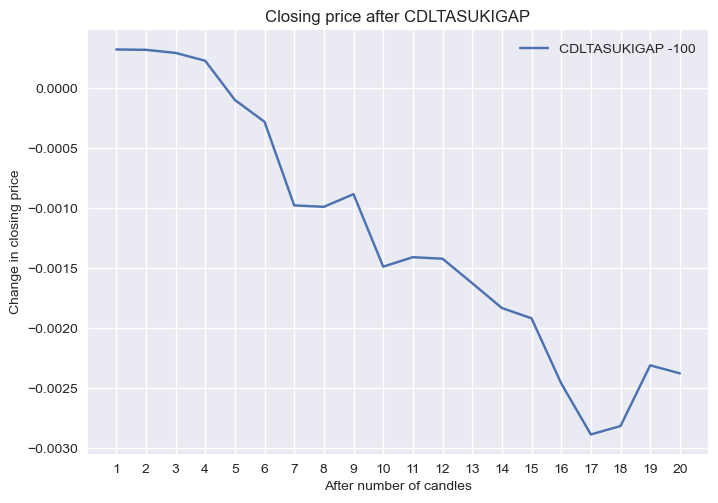

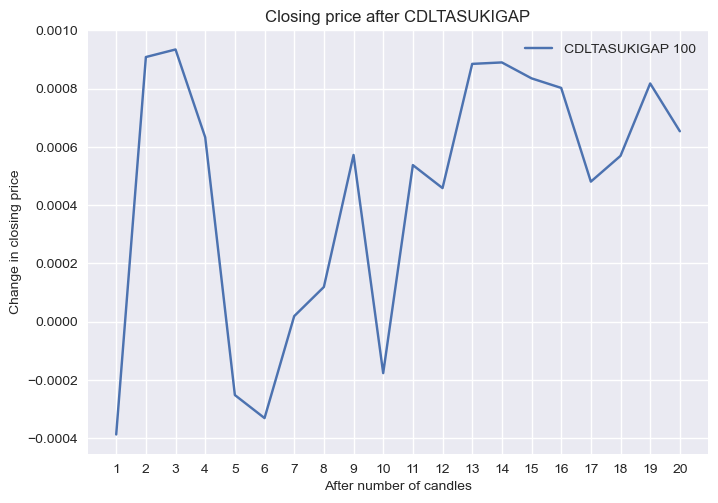

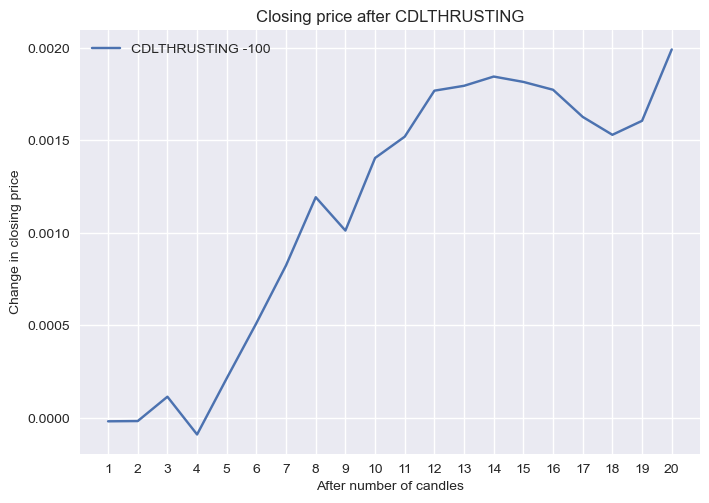

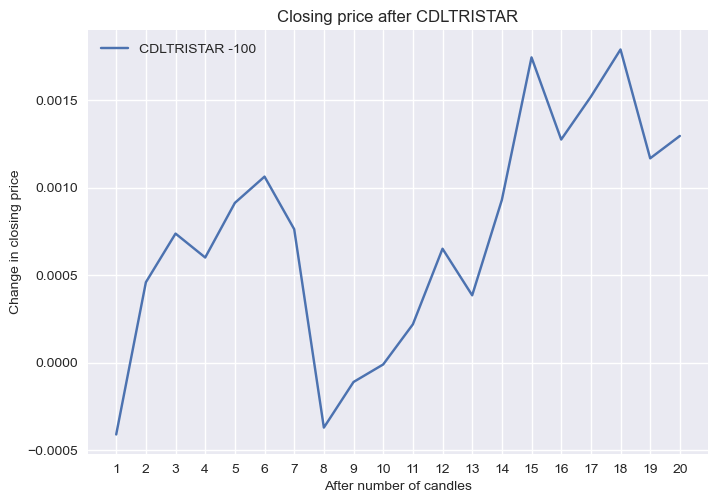

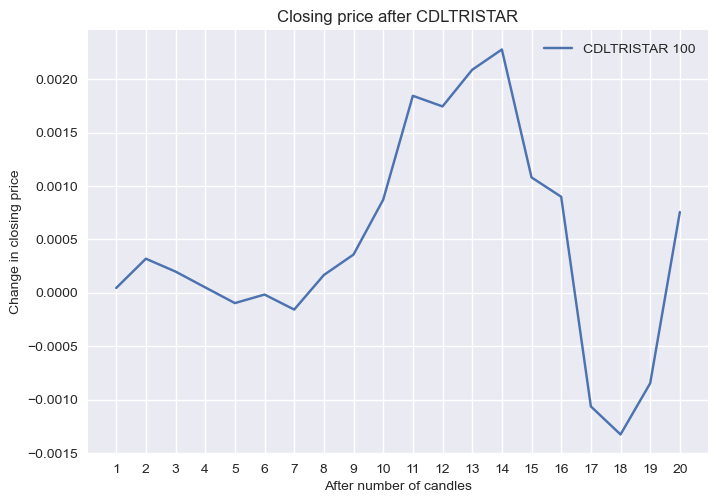

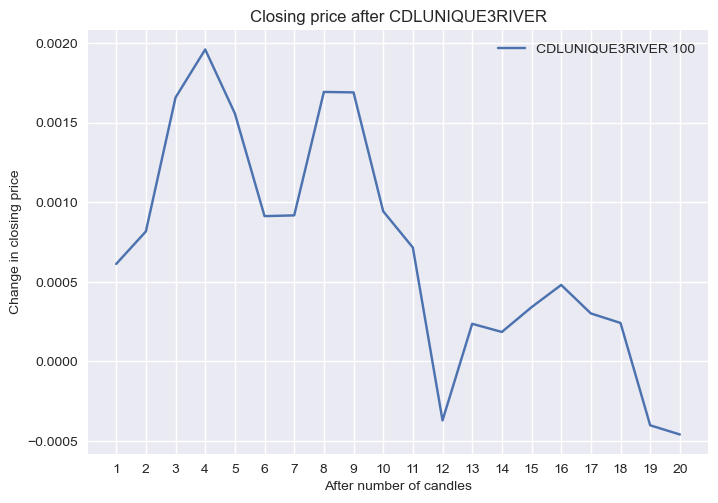

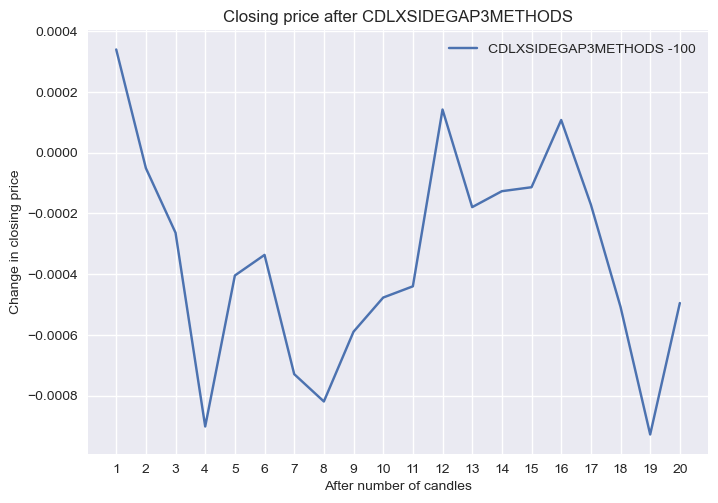

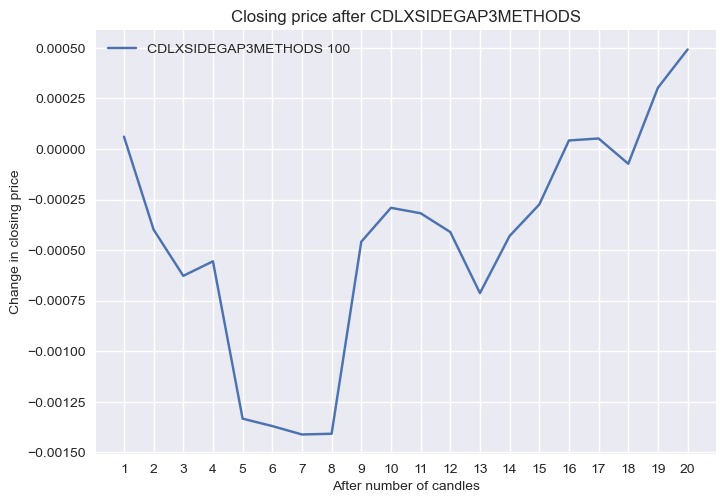

In [25]:
plt.figure(figsize = (10,5))
for i in cdl_cols:
    tmp = cdl[[i] + after].groupby(i).mean().drop(0)
    for ix in tmp.index:
        plt.plot(range(1, 21), tmp.loc[ix, :], label=f'{i} {ix}')
        plt.title(f'Сlosing price after {i}')
        plt.legend()
        plt.xlabel('After number of candles')
        plt.ylabel('Change in closing price')
        plt.xticks(range(1, 21))
        plt.show()